# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [106]:
#libraries

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
import math
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Understanding

In [2]:
#hp_df - housing_prediction_dataframe
hp_df=pd.read_csv("train.csv")

In [3]:
hp_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
hp_df.shape

(1460, 81)

In [5]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hp_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
hp_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
pd.set_option('display.max_rows', 100)

In [9]:
hp_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preparation 

In [10]:
# Count the number of missing values in each column and sort in descending order
total_missing = hp_df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values in each column and sort in descending order
percent_missing = (100 * hp_df.isnull().sum() / hp_df.shape[0]).sort_values(ascending=False)

# Combine the total and percentage missing values into a DataFrame
missing_values_df = pd.concat([total_missing, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

# Display missing values DataFrame
print(f"Missing values summary (first {missing_values_df.shape[0]} columns):\n{missing_values_df}")


Missing values summary (first 81 columns):
               Total missing  Percent missing
PoolQC                  1453        99.520548
MiscFeature             1406        96.301370
Alley                   1369        93.767123
Fence                   1179        80.753425
FireplaceQu              690        47.260274
LotFrontage              259        17.739726
GarageYrBlt               81         5.547945
GarageCond                81         5.547945
GarageType                81         5.547945
GarageFinish              81         5.547945
GarageQual                81         5.547945
BsmtFinType2              38         2.602740
BsmtExposure              38         2.602740
BsmtQual                  37         2.534247
BsmtCond                  37         2.534247
BsmtFinType1              37         2.534247
MasVnrArea                 8         0.547945
MasVnrType                 8         0.547945
Electrical                 1         0.068493
Id                         0         

In [11]:
percent_missing

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [12]:
# Count the number of columns with more than 20% missing values
num_missing_cols = (percent_missing > 20).sum()

# Print the result
print(f"{num_missing_cols} columns have more than 20% missing data.")


5 columns have more than 20% missing data.


In [13]:
# Select columns with less than 20% missing data
selected_columns = percent_missing[percent_missing < 20].index

# Create the cleaned DataFrame with selected columns
hp_df_cleaned = hp_df[selected_columns].copy()

# Print the shape of the cleaned DataFrame
print(f"Shape of cleaned DataFrame: {hp_df_cleaned.shape}")


Shape of cleaned DataFrame: (1460, 76)


In [14]:
hp_df_cleaned

LotFrontage  GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
0            65.0       2003.0         TA     Attchd          RFn         TA   
1            80.0       1976.0         TA     Attchd          RFn         TA   
2            68.0       2001.0         TA     Attchd          RFn         TA   
3            60.0       1998.0         TA     Detchd          Unf         TA   
4            84.0       2000.0         TA     Attchd          RFn         TA   
...           ...          ...        ...        ...          ...        ...   
1455         62.0       1999.0         TA     Attchd          RFn         TA   
1456         85.0       1978.0         TA     Attchd          Unf         TA   
1457         66.0       1941.0         TA     Attchd          RFn         TA   
1458         68.0       1950.0         TA     Attchd          Unf         TA   
1459         75.0       1965.0         TA     Attchd          Fin         TA   

     BsmtFinType2 BsmtExposure BsmtQual BsmtCond  ... BsmtUnfSF  BsmtFinSF1  \
0             Unf           No       Gd       TA  ...       150         706   
1             Unf           Gd       Gd       TA  ...       284         978   
2             Unf           Mn       Gd       TA  ...       434         486   
3             Unf           No       TA       Gd  ...       540         216   
4             Unf           Av       Gd       TA  ...       490         655   
...           ...          ...      ...      ...  ...       ...         ...   
1455          Unf           No       Gd       TA  ...       953           0   
1456          Rec           No       Gd       TA  ...       589         790   
1457          Unf           No       TA       Gd  ...       877         275   
1458          Rec           Mn       TA       TA  ...         0          49   
1459          LwQ           No       TA       TA  ...       136         830   

     RoofStyle Foundation  ExterCond ExterQual  Exterior2nd Exterior1st  \
0        Gable      PConc         TA        Gd      VinylSd     VinylSd   
1        Gable     CBlock         TA        TA      MetalSd     MetalSd   
2        Gable      PConc         TA        Gd      VinylSd     VinylSd   
3        Gable     BrkTil         TA        TA      Wd Shng     Wd Sdng   
4        Gable      PConc         TA        Gd      VinylSd     VinylSd   
...        ...        ...        ...       ...          ...         ...   
1455     Gable      PConc         TA        TA      VinylSd     VinylSd   
1456     Gable     CBlock         TA        TA      Plywood     Plywood   
1457     Gable      Stone         Gd        Ex      CmentBd     CemntBd   
1458       Hip     CBlock         TA        TA      MetalSd     MetalSd   
1459     Gable     CBlock         TA        Gd      HdBoard     HdBoard   

      RoofMatl  SalePrice  
0      CompShg     208500  
1      CompShg     181500  
2      CompShg     223500  
3      CompShg     140000  
4      CompShg     250000  
...        ...        ...  
1455   CompShg     175000  
1456   CompShg     210000  
1457   CompShg     266500  
1458   CompShg     142125  
1459   CompShg     147500  

[1460 rows x 76 columns]

In [15]:
# Count the number of unique values in each column of the cleaned DataFrame
unique_counts = hp_df_cleaned.nunique()

# Print the result
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
LotFrontage       110
GarageYrBlt        97
GarageCond          5
GarageType          6
GarageFinish        3
GarageQual          5
BsmtFinType2        6
BsmtExposure        4
BsmtQual            4
BsmtCond            4
BsmtFinType1        6
MasVnrArea        327
MasVnrType          4
Electrical          5
Id               1460
Functional          7
Fireplaces          4
KitchenQual         4
KitchenAbvGr        4
BedroomAbvGr        8
HalfBath            3
FullBath            4
BsmtHalfBath        3
TotRmsAbvGrd       12
GarageCars          5
GrLivArea         861
GarageArea        441
PavedDrive          3
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
BsmtFullBath        4
HeatingQC           5
LowQualFinSF       24
LandSlope           3
OverallQual   

In [16]:
# Loop over each column of the cleaned DataFrame and print the value counts
for col in hp_df_cleaned.columns:
    print(f"Value counts for {col}:")
    print(hp_df_cleaned[col].value_counts())
    print()

Value counts for LotFrontage:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

Value counts for GarageYrBlt:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0    

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64

Value counts for CentralAir:
Y    1365
N      95
Name: CentralAir, dtype: int64

Value counts for MSSubClass:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Value counts for Heating:
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Value counts for TotalBsmtSF:
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

Value counts for BsmtUnfSF:
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dty

### Handling missing values in cateorical columns

In [17]:
# Get the list of Categorical column
object_cols = list(hp_df_cleaned.select_dtypes(include=['object']).columns)

# Print the list of categorical columns
print("Categorical columns:")
print(object_cols)

Categorical columns:
['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical', 'Functional', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'HeatingQC', 'LandSlope', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning', 'CentralAir', 'Heating', 'RoofStyle', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl']


In [18]:
print(len(object_cols))


38


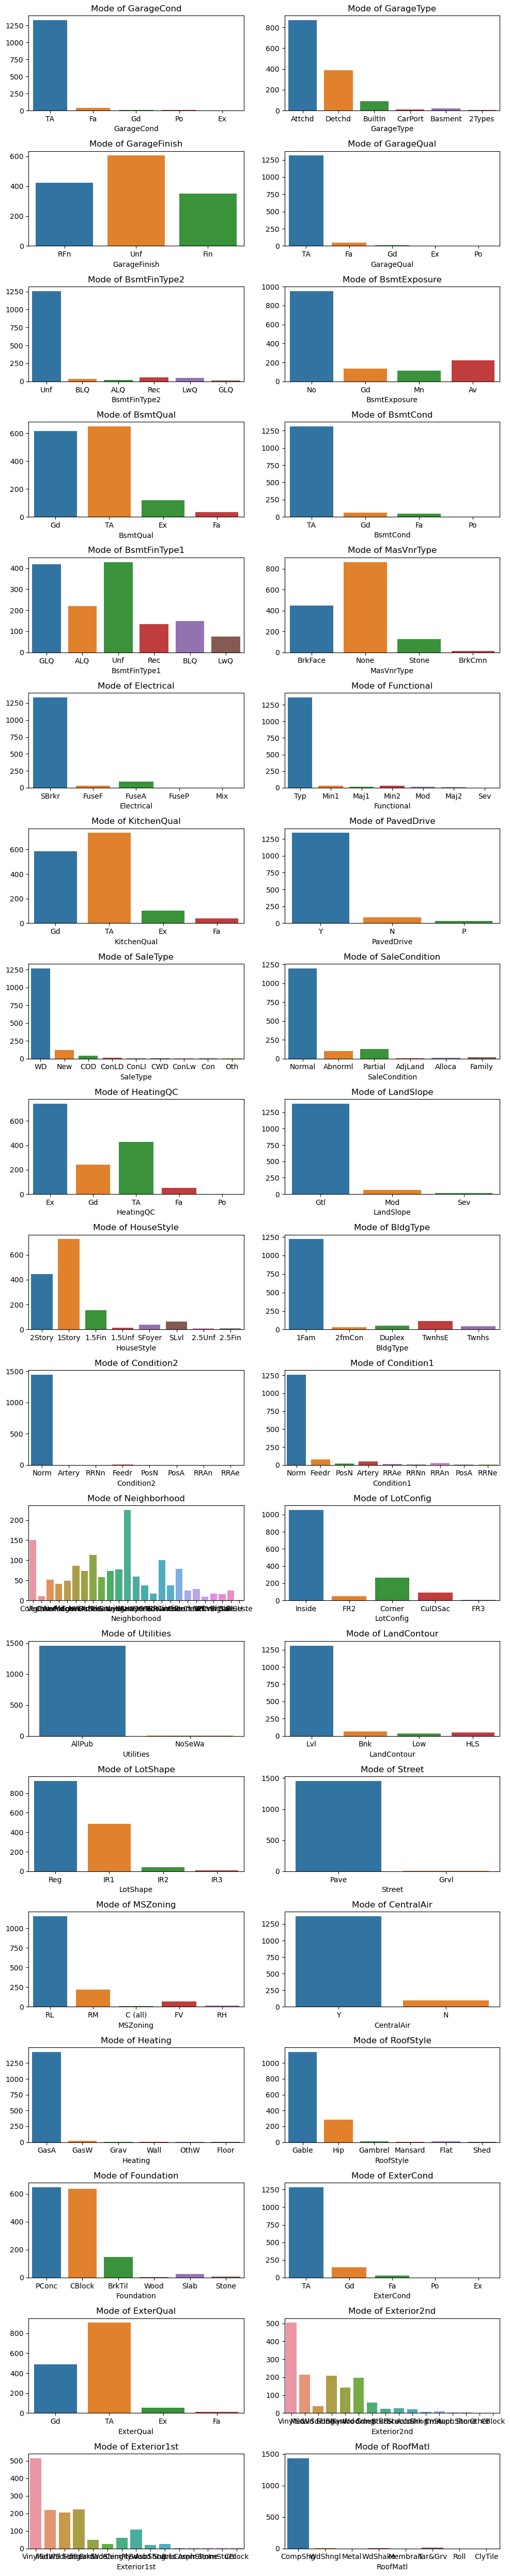

In [19]:
# Get the list of categorical columns
object_cols = list(hp_df_cleaned.select_dtypes(include=['object']).columns)

# Calculate the number of rows and columns for the grid
nrows = 19
ncols = 2

# Calculate the total number of plots to be created
nplots = len(object_cols)

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 50))

axes = axes.flatten()

# Loop over each categorical column and plot the mode on a subplot
for i, col in enumerate(object_cols):
    # Plot the mode of the column on a subplot
    sns.countplot(hp_df_cleaned[col], ax=axes[i])
    axes[i].set_title(f"Mode of {col}")
    
    # Hide the y-axis label for better visualization
    axes[i].set_ylabel('')
    
# Hide the remaining subplots
for j in range(i+1, nrows*ncols):
    axes[j].axis('off')

# Adjust the spacing of the subplots
fig.tight_layout()

# Show the plot
plt.show()


In [20]:
hp_df_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [21]:
# Impute missing values in 'GarageCond' with the mode (i.e., 'TA')
mode_GarageCond = hp_df_cleaned['GarageCond'].mode()[0]
hp_df_cleaned['GarageCond'] = hp_df_cleaned['GarageCond'].fillna(mode_GarageCond)

In [22]:
hp_df_cleaned.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [23]:
hp_df_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
# Impute missing values in 'GarageType' with the mode (i.e., 'ATTCHD')
mode_GarageType = hp_df_cleaned['GarageType'].mode()[0]
hp_df_cleaned['GarageType'] = hp_df_cleaned['GarageType'].fillna(mode_GarageType)

In [25]:
hp_df_cleaned.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [26]:
hp_df_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [27]:
# Impute missing values in 'GarageFinish' with a new category 'Unknown'
hp_df_cleaned['GarageFinish'] = hp_df_cleaned['GarageFinish'].fillna('Unknown')

In [28]:
hp_df_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

In [29]:
hp_df_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [30]:
# Impute missing values in 'GarageQual' with the mode (i.e., 'TA')
mode_GarageQual = hp_df_cleaned['GarageQual'].mode()[0]
hp_df_cleaned['GarageQual'] = hp_df_cleaned['GarageQual'].fillna(mode_GarageQual)

In [31]:
hp_df_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

### Handling missing values in Numerical columns

In [32]:
# Get the total number of missing values and missing value percentage for each numerical column
num_cols = list(hp_df_cleaned.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'Id',
 'Fireplaces',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'BsmtFullBath',
 'LowQualFinSF',
 'OverallQual',
 'YearBuilt',
 'LotArea',
 'OverallCond',
 'YearRemodAdd',
 '2ndFlrSF',
 'BsmtFinSF2',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'SalePrice']

In [33]:
num_missing = hp_df_cleaned[num_cols].isnull().sum().sort_values(ascending=False)
num_missing_percent = (100 * num_missing / len(hp_df_cleaned)).sort_values(ascending=False)
num_missing_data = pd.concat([num_missing, num_missing_percent], axis=1, keys=['Total Missing Values', 'Percentage of Missing Values'])
num_missing_data.head()

Total Missing Values  Percentage of Missing Values
LotFrontage                   259                     17.739726
GarageYrBlt                    81                      5.547945
MasVnrArea                      8                      0.547945
BsmtFinSF1                      0                      0.000000
MoSold                          0                      0.000000

<AxesSubplot:xlabel='LotFrontage'>

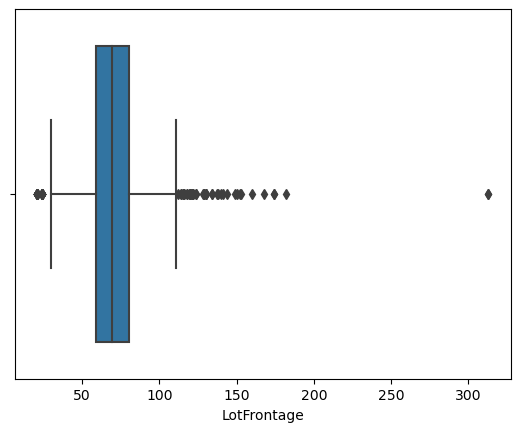

In [34]:
# Check for outliers in 'LotFrontage' column using a box plot
sns.boxplot(x=hp_df_cleaned['LotFrontage'])

In [35]:
# Calculate the median of 'LotFrontage' column
median_LotFrontage = hp_df_cleaned['LotFrontage'].median()
median_LotFrontage

69.0

In [36]:
# Impute missing values in 'LotFrontage' with the median
hp_df_cleaned['LotFrontage'] = hp_df_cleaned['LotFrontage'].fillna(median_LotFrontage)

<AxesSubplot:xlabel='GarageYrBlt'>

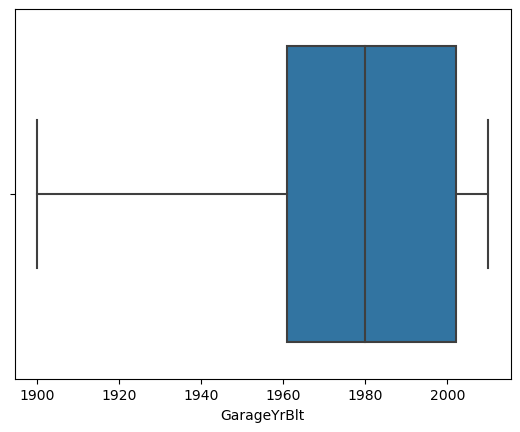

In [37]:
# Check for outliers in 'GarageYrBlt' column using a box plot
sns.boxplot(x=hp_df_cleaned['GarageYrBlt'])

In [38]:
# Calculate the mean of 'GarageYrBlt' column
mean_GarageYrBlt = hp_df_cleaned['GarageYrBlt'].mean()
mean_GarageYrBlt

1978.5061638868744

In [39]:
# Impute missing values in 'GarageYrBlt' with the mean
hp_df_cleaned['GarageYrBlt'] = hp_df_cleaned['GarageYrBlt'].fillna(mean_GarageYrBlt)

<AxesSubplot:xlabel='MasVnrArea'>

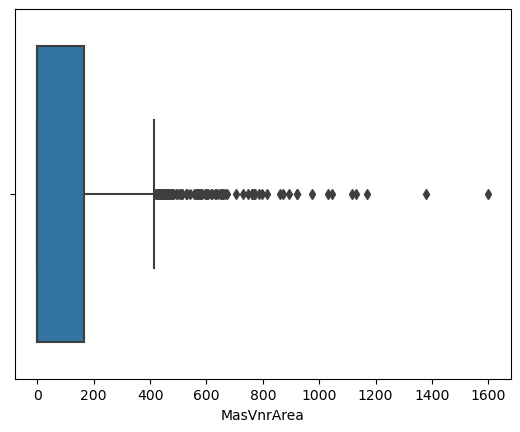

In [40]:
# Check for outliers in 'MasVnrArea' column using a box plot
sns.boxplot(x=hp_df_cleaned['MasVnrArea'])

In [41]:
# Calculate the median of 'MasVnrArea' column
median_MasVnrArea = hp_df_cleaned['MasVnrArea'].median()
median_MasVnrArea

0.0

In [42]:
# Impute missing values in 'MasVnrArea' with the median
hp_df_cleaned['MasVnrArea'] = hp_df_cleaned['MasVnrArea'].fillna(median_MasVnrArea)

In [43]:
hp_df_cleaned.dropna(inplace=True)

In [44]:
num_missing = hp_df_cleaned[num_cols].isnull().sum().sort_values(ascending=False)
num_missing_percent = (100 * num_missing / len(hp_df_cleaned)).sort_values(ascending=False)
num_missing_data = pd.concat([num_missing, num_missing_percent], axis=1, keys=['Total Missing Values', 'Percentage of Missing Values'])
num_missing_data.head()

Total Missing Values  Percentage of Missing Values
LotFrontage                      0                           0.0
OverallCond                      0                           0.0
MoSold                           0                           0.0
YrSold                           0                           0.0
BsmtFullBath                     0                           0.0

### Results: Missing values of both cateorical columns and numerical are handled

## Data Exploration

In [45]:
hp_df_cleaned

LotFrontage  GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
0            65.0       2003.0         TA     Attchd          RFn         TA   
1            80.0       1976.0         TA     Attchd          RFn         TA   
2            68.0       2001.0         TA     Attchd          RFn         TA   
3            60.0       1998.0         TA     Detchd          Unf         TA   
4            84.0       2000.0         TA     Attchd          RFn         TA   
...           ...          ...        ...        ...          ...        ...   
1455         62.0       1999.0         TA     Attchd          RFn         TA   
1456         85.0       1978.0         TA     Attchd          Unf         TA   
1457         66.0       1941.0         TA     Attchd          RFn         TA   
1458         68.0       1950.0         TA     Attchd          Unf         TA   
1459         75.0       1965.0         TA     Attchd          Fin         TA   

     BsmtFinType2 BsmtExposure BsmtQual BsmtCond  ... BsmtUnfSF  BsmtFinSF1  \
0             Unf           No       Gd       TA  ...       150         706   
1             Unf           Gd       Gd       TA  ...       284         978   
2             Unf           Mn       Gd       TA  ...       434         486   
3             Unf           No       TA       Gd  ...       540         216   
4             Unf           Av       Gd       TA  ...       490         655   
...           ...          ...      ...      ...  ...       ...         ...   
1455          Unf           No       Gd       TA  ...       953           0   
1456          Rec           No       Gd       TA  ...       589         790   
1457          Unf           No       TA       Gd  ...       877         275   
1458          Rec           Mn       TA       TA  ...         0          49   
1459          LwQ           No       TA       TA  ...       136         830   

     RoofStyle Foundation  ExterCond ExterQual  Exterior2nd Exterior1st  \
0        Gable      PConc         TA        Gd      VinylSd     VinylSd   
1        Gable     CBlock         TA        TA      MetalSd     MetalSd   
2        Gable      PConc         TA        Gd      VinylSd     VinylSd   
3        Gable     BrkTil         TA        TA      Wd Shng     Wd Sdng   
4        Gable      PConc         TA        Gd      VinylSd     VinylSd   
...        ...        ...        ...       ...          ...         ...   
1455     Gable      PConc         TA        TA      VinylSd     VinylSd   
1456     Gable     CBlock         TA        TA      Plywood     Plywood   
1457     Gable      Stone         Gd        Ex      CmentBd     CemntBd   
1458       Hip     CBlock         TA        TA      MetalSd     MetalSd   
1459     Gable     CBlock         TA        Gd      HdBoard     HdBoard   

      RoofMatl  SalePrice  
0      CompShg     208500  
1      CompShg     181500  
2      CompShg     223500  
3      CompShg     140000  
4      CompShg     250000  
...        ...        ...  
1455   CompShg     175000  
1456   CompShg     210000  
1457   CompShg     266500  
1458   CompShg     142125  
1459   CompShg     147500  

[1412 rows x 76 columns]

- > The housing dataset contains four columns related to the construction years: 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', and 'YrSold'.<br>
- > We choose 'YearRemodAdd' instead of 'YearBuilt' because a remodeled house would be considered newer than its original construction year.<br>
- > We can drop the 'YearBuilt', 'YearRemodAdd', and 'GarageYrBlt' columns as they are no longer needed.<br>
- > We can keep the 'YrSold' column as it might be useful in our analysis.<br>

In [46]:
hp_df_cleaned['Age'] = hp_df_cleaned['YrSold']-hp_df_cleaned['YearRemodAdd']
hp_df_cleaned['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [47]:
hp_df_cleaned = hp_df_cleaned.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [48]:
hp_df_cleaned.head()

LotFrontage  GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
0         65.0       2003.0         TA     Attchd          RFn         TA   
1         80.0       1976.0         TA     Attchd          RFn         TA   
2         68.0       2001.0         TA     Attchd          RFn         TA   
3         60.0       1998.0         TA     Detchd          Unf         TA   
4         84.0       2000.0         TA     Attchd          RFn         TA   

  BsmtFinType2 BsmtExposure BsmtQual BsmtCond  ... BsmtFinSF1  RoofStyle  \
0          Unf           No       Gd       TA  ...        706      Gable   
1          Unf           Gd       Gd       TA  ...        978      Gable   
2          Unf           Mn       Gd       TA  ...        486      Gable   
3          Unf           No       TA       Gd  ...        216      Gable   
4          Unf           Av       Gd       TA  ...        655      Gable   

  Foundation ExterCond  ExterQual Exterior2nd  Exterior1st RoofMatl  \
0      PConc        TA         Gd     VinylSd      VinylSd  CompShg   
1     CBlock        TA         TA     MetalSd      MetalSd  CompShg   
2      PConc        TA         Gd     VinylSd      VinylSd  CompShg   
3     BrkTil        TA         TA     Wd Shng      Wd Sdng  CompShg   
4      PConc        TA         Gd     VinylSd      VinylSd  CompShg   

   SalePrice  Age  
0     208500    5  
1     181500   31  
2     223500    6  
3     140000   36  
4     250000    8  

[5 rows x 73 columns]

In [49]:
hp_df_cleaned=hp_df_cleaned.drop(['Id'], axis = 1) 

In [50]:
hp_df_cleaned.head()

LotFrontage  GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
0         65.0       2003.0         TA     Attchd          RFn         TA   
1         80.0       1976.0         TA     Attchd          RFn         TA   
2         68.0       2001.0         TA     Attchd          RFn         TA   
3         60.0       1998.0         TA     Detchd          Unf         TA   
4         84.0       2000.0         TA     Attchd          RFn         TA   

  BsmtFinType2 BsmtExposure BsmtQual BsmtCond  ... BsmtFinSF1  RoofStyle  \
0          Unf           No       Gd       TA  ...        706      Gable   
1          Unf           Gd       Gd       TA  ...        978      Gable   
2          Unf           Mn       Gd       TA  ...        486      Gable   
3          Unf           No       TA       Gd  ...        216      Gable   
4          Unf           Av       Gd       TA  ...        655      Gable   

  Foundation ExterCond ExterQual  Exterior2nd Exterior1st  RoofMatl  \
0      PConc        TA        Gd      VinylSd     VinylSd   CompShg   
1     CBlock        TA        TA      MetalSd     MetalSd   CompShg   
2      PConc        TA        Gd      VinylSd     VinylSd   CompShg   
3     BrkTil        TA        TA      Wd Shng     Wd Sdng   CompShg   
4      PConc        TA        Gd      VinylSd     VinylSd   CompShg   

   SalePrice  Age  
0     208500    5  
1     181500   31  
2     223500    6  
3     140000   36  
4     250000    8  

[5 rows x 72 columns]

### Univariate analysis

In [51]:
num_cols = list(hp_df_cleaned.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'BsmtFullBath',
 'LowQualFinSF',
 'OverallQual',
 'LotArea',
 'OverallCond',
 '2ndFlrSF',
 'BsmtFinSF2',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'SalePrice',
 'Age']

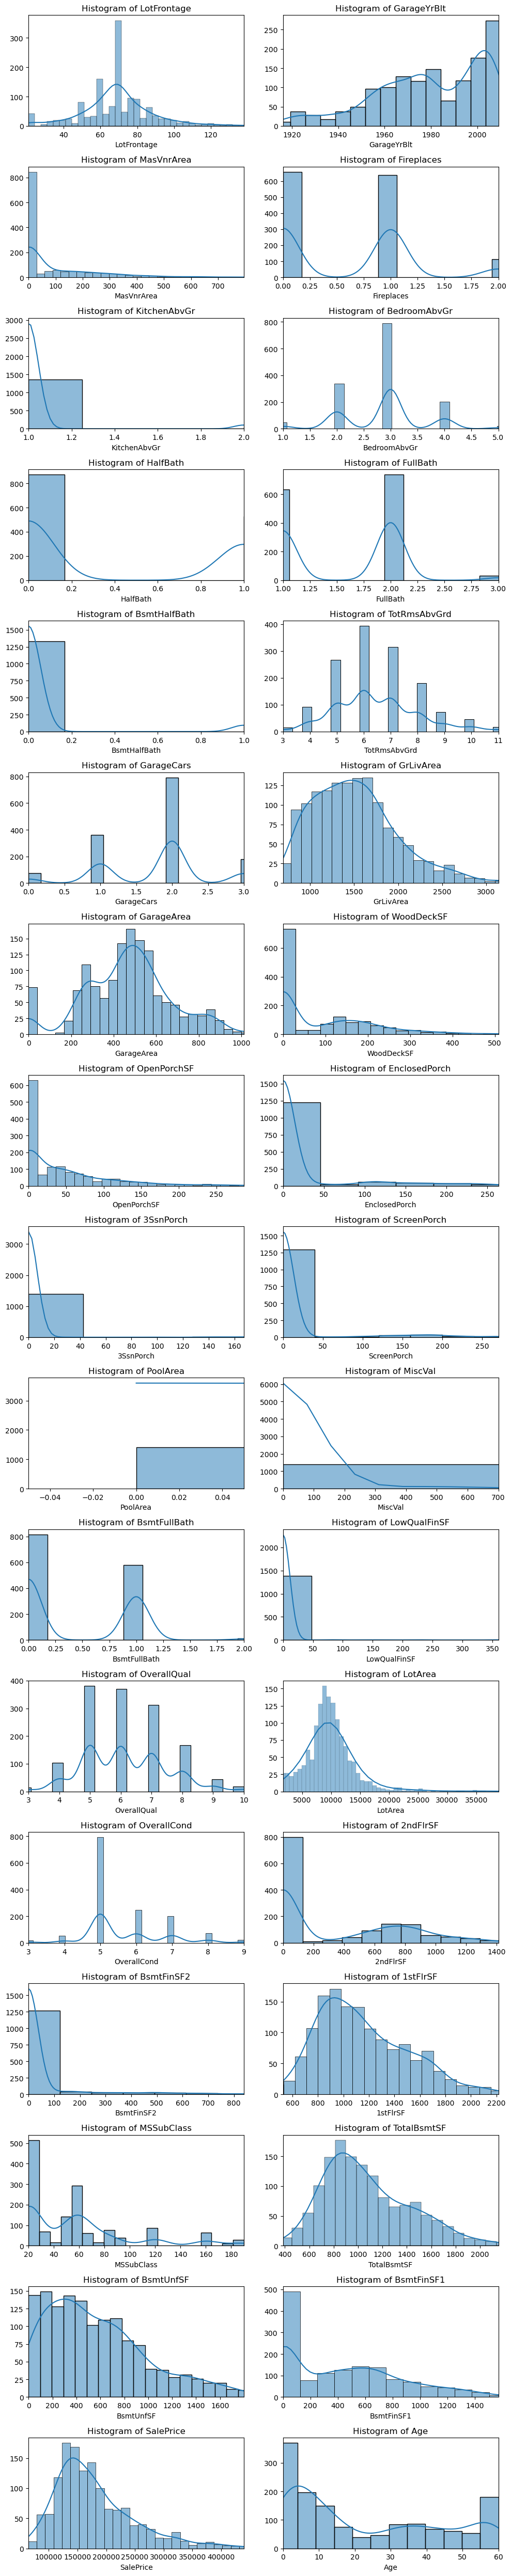

In [52]:
# Calculate the number of rows and columns for the grid
nrows = math.ceil(len(num_cols) / 2)
ncols = 2

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 50))

axes = axes.flatten()

# Loop over each numerical column and plot the histogram on a subplot
for i, col in enumerate(num_cols):
    # Plot the histogram of the column on a subplot
    sns.histplot(hp_df_cleaned[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {col}")
    
    # Hide the y-axis label for better visualization
    axes[i].set_ylabel('')
    
    # Set the x-axis limits to the 1st and 99th percentile values to exclude outliers
    q1 = hp_df_cleaned[col].quantile(0.01)
    q99 = hp_df_cleaned[col].quantile(0.99)
    axes[i].set_xlim([q1, q99])

# Hide the remaining subplots
for j in range(i+1, nrows*ncols):
    axes[j].axis('off')

# Adjust the spacing of the subplots
fig.tight_layout()

# Show the plot
plt.show()


### Inferences : <br>
- > Numerical variables (num_cols): Histograms were plotted for each numerical variable to visualize their distributions. It was found that some variables were highly skewed, such as 'LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', and 'SalePrice'. <br><br>
- > Categorical variables (object_cols): Countplots were plotted for each categorical variable to visualize the distribution of each category. It was found that some variables had one dominant category, such as 'Street' and 'Utilities', while others had more evenly distributed categories, such as 'Neighborhood' and 'Exterior1st'. <br>


### Bivariate analysis

<AxesSubplot:>

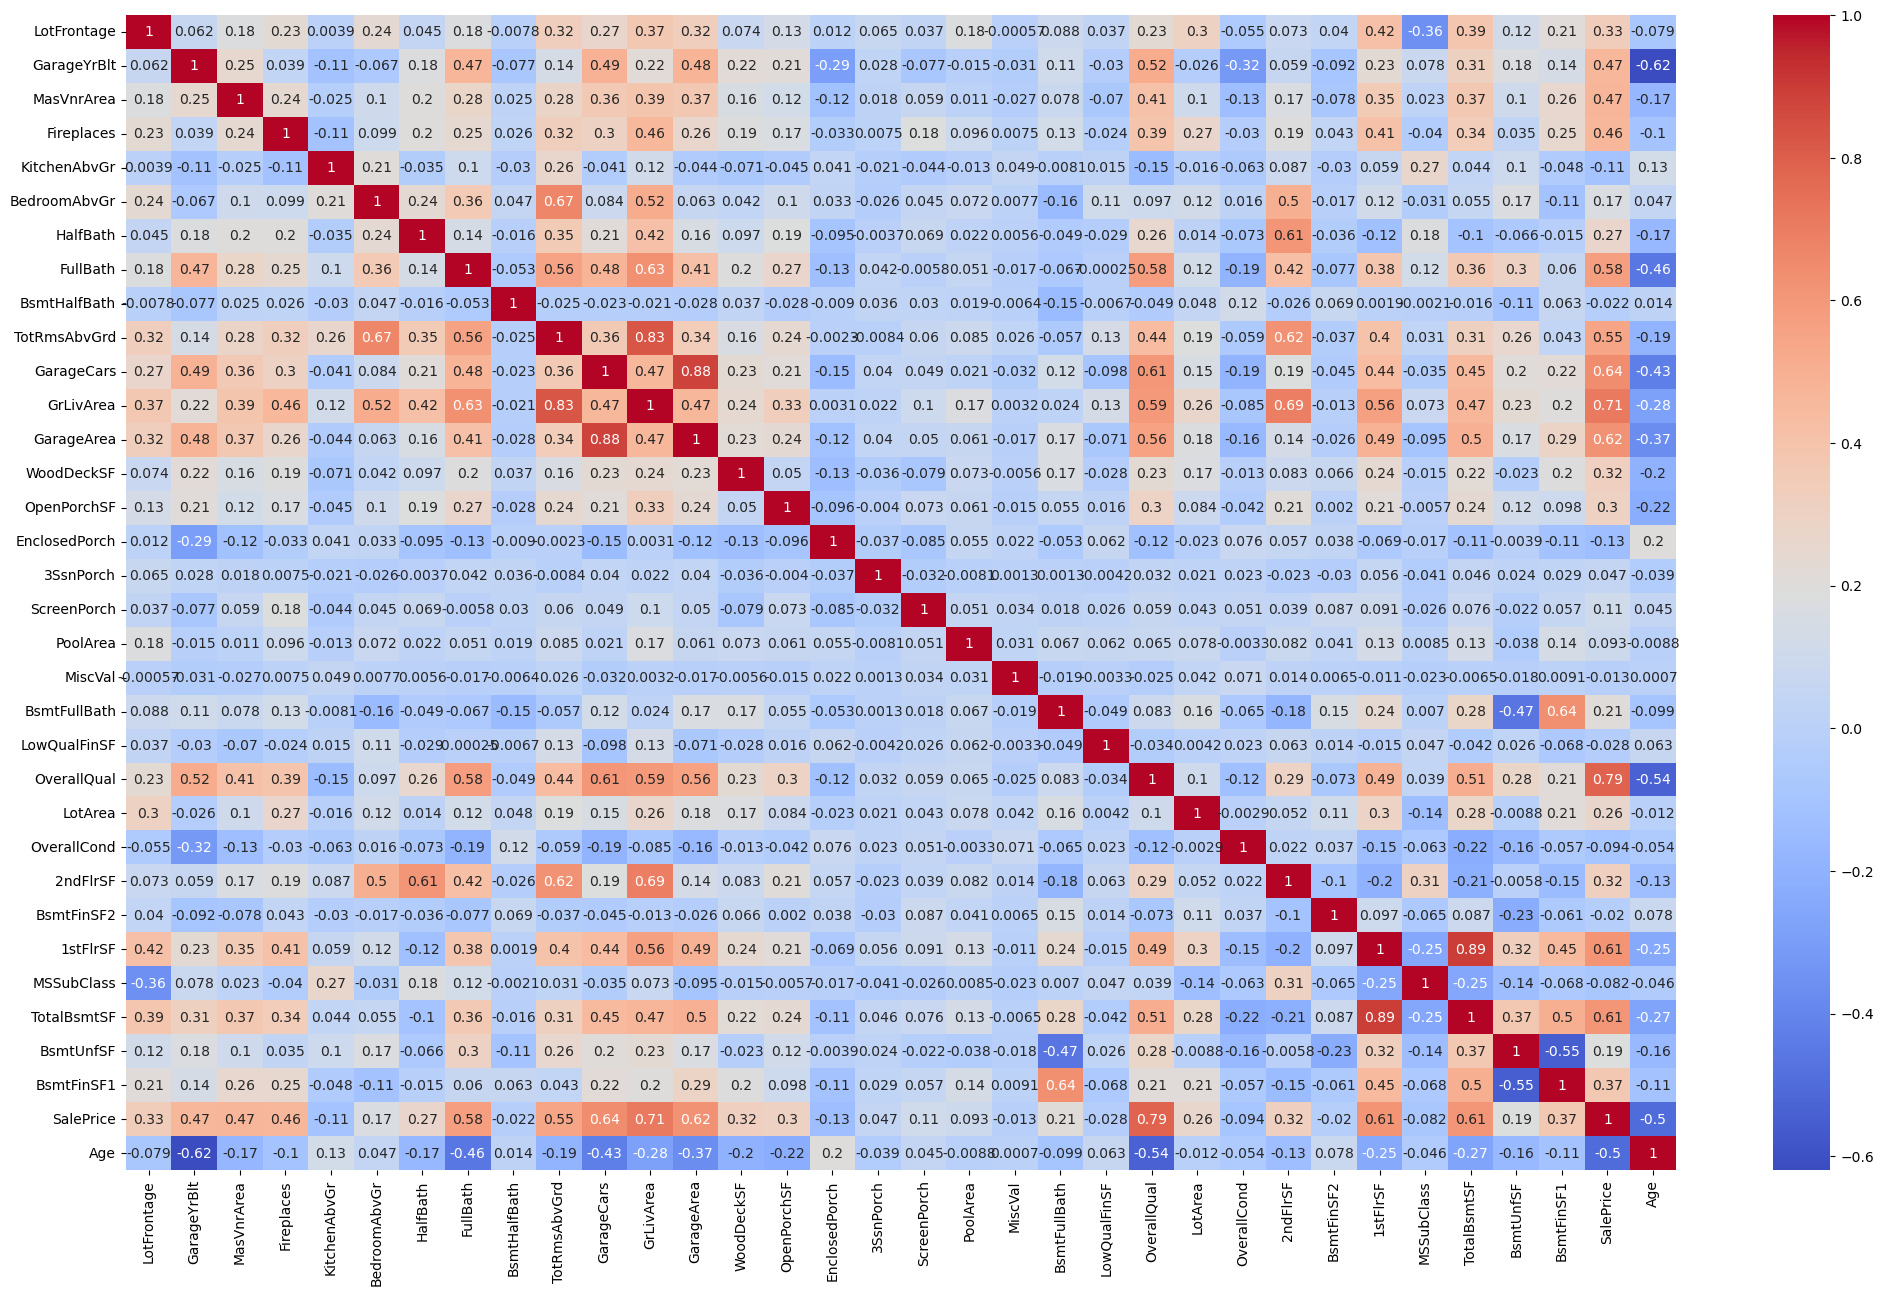

In [53]:
# figure size
plt.figure(figsize=(25,15))

# Create a correlation matrix of numeric columns
corr_matrix = hp_df_cleaned[num_cols].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

- > Correlation matrix: A correlation matrix was plotted for the numerical variables to visualize the correlation between each pair of variables. It was found that some variables were highly correlated with each other, such as 'GarageYrBlt' and 'YearBuilt', 'TotRmsAbvGrd' and 'GrLivArea', and 'GarageCars' and 'GarageArea'.

### Inferences of salesprice from corr matrix :
- > Overall Quality has the highest positive correlation with SalePrice (0.79)
- > 1stFlrSF, TotalBsmtSF, GrLivArea, GarageCars, and GarageArea also have strong positive correlations with SalePrice (0.61, 0.61, 0.71, 0.64, and 0.62 respectively)
- > FullBath and TotRmsAbvGrd have moderate positive correlations with SalePrice (0.58 and 0.55 respectively)
- > Age has a moderate negative correlation with SalePrice (-0.5)
- > The distribution of SalePrice is highly skewed, indicating the presence of outliers
- > The majority of the houses sold in the dataset fall in the price range of 100,000 to 250,000
- > SalePrice has a positive linear relationship with the log-transformed GrLivArea and 1stFlrSF, indicating that these features might be important predictors of SalePrice

In [54]:
# Get the top 10 variables correlated with SalePrice
# We can adjust the variables after analysing
top_corr_features = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index

# Print the top 10 correlated variables
print(top_corr_features)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea',
       'GarageYrBlt'],
      dtype='object')


#### 1.Overall Quality vs SalePrice:

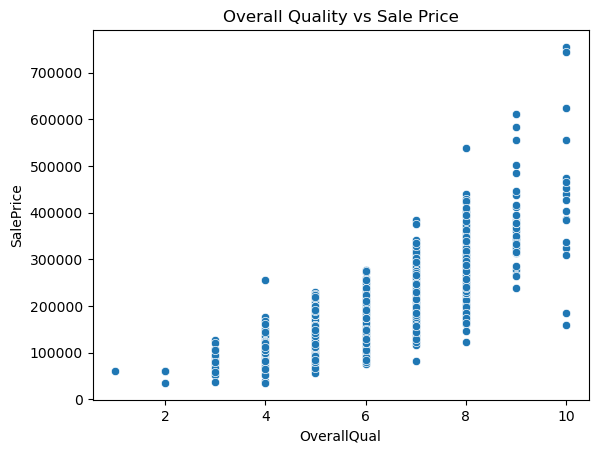

In [55]:
sns.scatterplot(data=hp_df_cleaned, x='OverallQual', y='SalePrice')
plt.title('Overall Quality vs Sale Price')
plt.show()

- > Scatter plot: This plot shows the relationship between Overall Quality and SalePrice. We can see that there is a positive correlation between the two variables, where higher quality homes tend to sell for higher prices.

#### 2. 1stFlrSF vs SalePrice: <br>

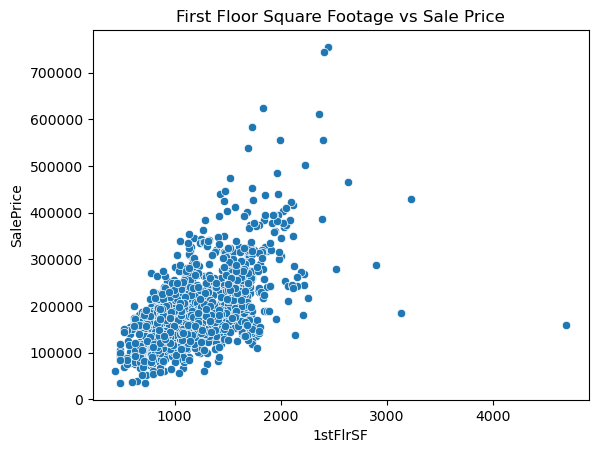

In [56]:
sns.scatterplot(data=hp_df_cleaned, x='1stFlrSF', y='SalePrice')
plt.title('First Floor Square Footage vs Sale Price')
plt.show()

- > Scatter plot: This plot shows the relationship between the first floor square footage and SalePrice. We can see that there is a positive correlation between the two variables, where larger homes tend to sell for higher prices.

#### 3.GrLivArea vs SalePrice:<br>

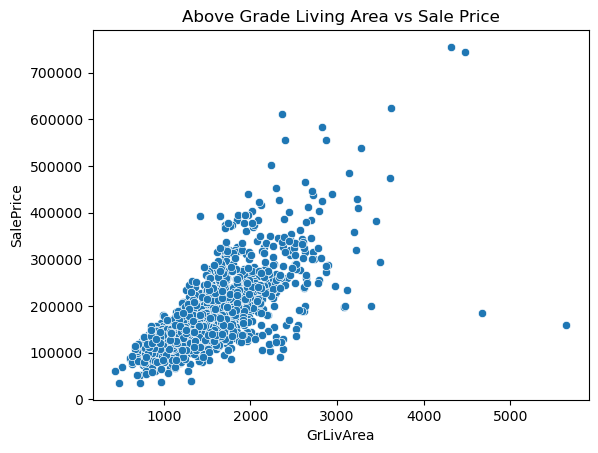

In [57]:
sns.scatterplot(data=hp_df_cleaned, x='GrLivArea', y='SalePrice')
plt.title('Above Grade Living Area vs Sale Price')
plt.show()

- > Scatter plot: This plot shows the relationship between the above grade living area and SalePrice. We can see that there is a positive correlation between the two variables, where larger homes tend to sell for higher prices.

#### 4. FullBath vs SalePrice:

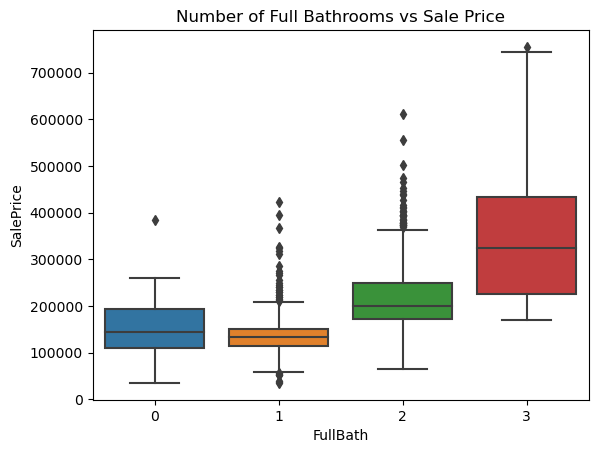

In [58]:
sns.boxplot(data=hp_df_cleaned, x='FullBath', y='SalePrice')
plt.title('Number of Full Bathrooms vs Sale Price')
plt.show()

- > Box plot: This plot shows the distribution of SalePrice for each number of full bathrooms. We can see that homes with more full bathrooms tend to sell for higher prices.

#### 5. GarageCars vs SalePrice:

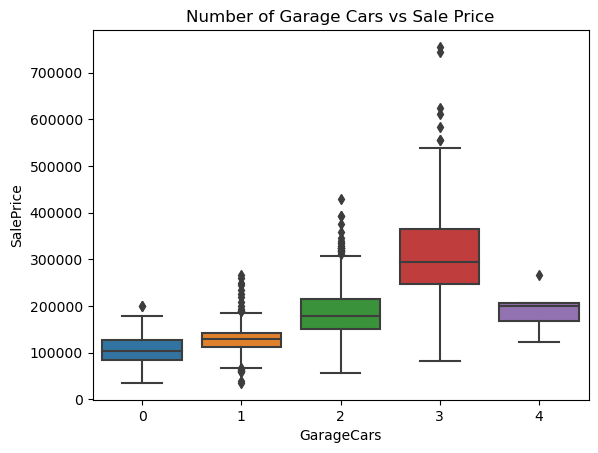

In [59]:
sns.boxplot(data=hp_df_cleaned, x='GarageCars', y='SalePrice')
plt.title('Number of Garage Cars vs Sale Price')
plt.show()

- > Box plot: This plot shows the distribution of SalePrice for each number of garage cars. We can see that homes with more garage cars tend to sell for higher prices.

#### 6. MasVnrArea vs SalePrice

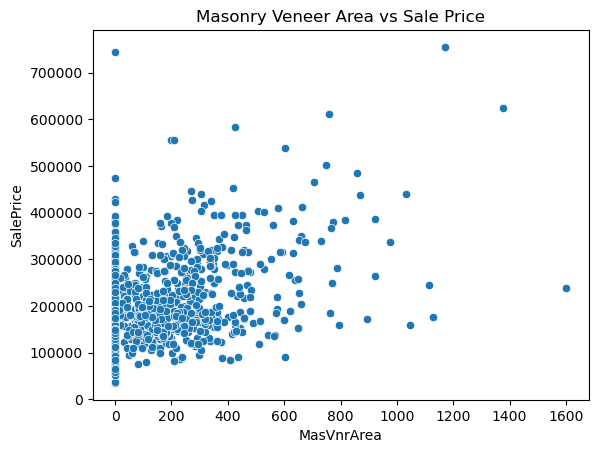

In [60]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=hp_df_cleaned)
plt.title('Masonry Veneer Area vs Sale Price')
plt.show()

- > The plot shows that there is a positive correlation between the masonry veneer area and sale price. However, there are many data points with zero masonry veneer area that have varying sale prices.

#### 7. GarageYrBlt vs SalePrice

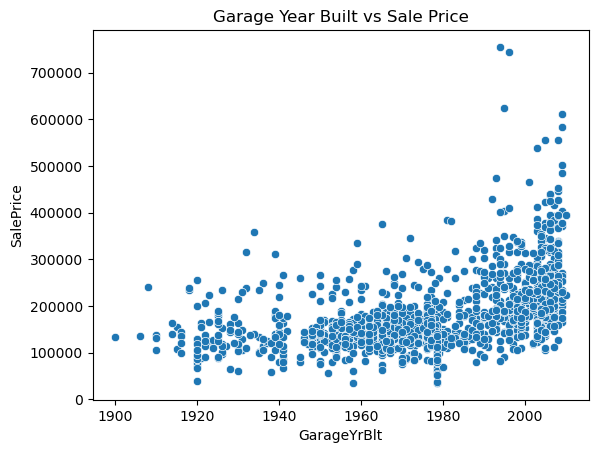

In [61]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=hp_df_cleaned)
plt.title('Garage Year Built vs Sale Price')
plt.show()

- > The plot shows that there is a weak correlation between the year the garage was built and sale price. There are also many data points with missing values for the garage year built.

#### 8. TotalBsmtSF vs SalePrice

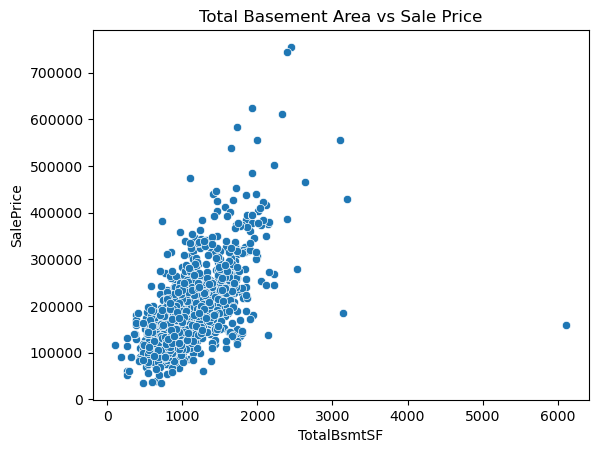

In [62]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=hp_df_cleaned)
plt.title('Total Basement Area vs Sale Price')
plt.show()

- > The plot shows that there is a positive correlation between the total basement area and sale price. However, there are many data points with zero basement area that have varying sale prices.

In [63]:
cat_cols  = hp_df_cleaned.dtypes[hp_df_cleaned.dtypes == "object"].index
cat_cols  

Index(['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType', 'Electrical', 'Functional', 'KitchenQual', 'PavedDrive',
       'SaleType', 'SaleCondition', 'HeatingQC', 'LandSlope', 'HouseStyle',
       'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig',
       'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning',
       'CentralAir', 'Heating', 'RoofStyle', 'Foundation', 'ExterCond',
       'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl'],
      dtype='object')

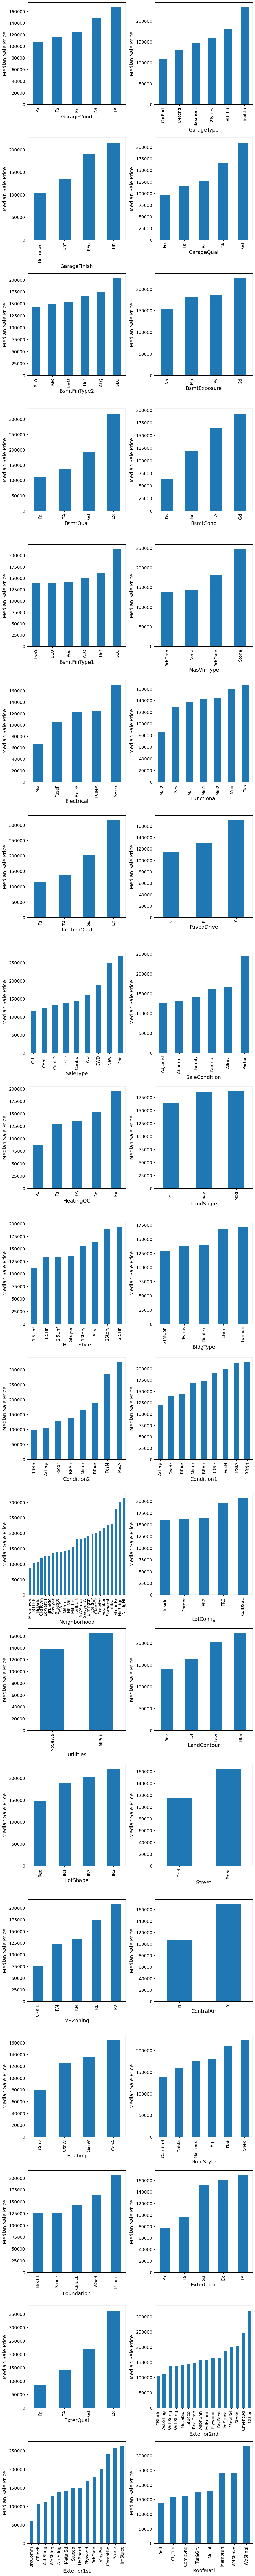

In [64]:
# define number of rows and columns
num_cols = 2
num_rows = math.ceil(len(cat_cols)/num_cols)

# create a figure and axes for each plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 100))

# loop through each categorical column and plot a bar graph
for i, col in enumerate(cat_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    hp_df_cleaned.groupby(col)['SalePrice'].median().sort_values().plot(kind='bar', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=14)
    axes[row_idx, col_idx].set_ylabel('Median Sale Price', fontsize=14)
    axes[row_idx, col_idx].tick_params(axis='x', labelsize=12)
    axes[row_idx, col_idx].tick_params(axis='y', labelsize=12)
    
plt.tight_layout()
plt.show()


### Inferences we can draw from the bivariate analysis of the categorical variables:
 
- > Properties with MSZoning type 'FV' tend to have higher sale prices, while those with 'C' tend to have lower sale prices.

- > Properties with a Pave street tend to have higher sale prices compared to those with Grvl streets.

- > The Utilities column has mostly 'AllPub' values and does not provide much information, as it is not an important feature.

- > Properties with Excellent Exterior Quality, Basement Quality, Kitchen Quality, and Garage Quality tend to have higher sale prices.

- > Properties with BuiltIn type garages tend to have higher sale prices compared to other garage types.

- > Properties with Sale Type 'New' tend to have higher sale prices compared to other sale types.

- > Properties with Central Air conditioning tend to have higher sale prices compared to those without it.

Overall, the categorical variables appear to have a significant impact on the sale prices of properties, and it is important to consider them when building a predictive model.

## Data Preprocessing

In [65]:
hp_df_cleaned['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [66]:
hp_df_cleaned['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
208300     1
289000     1
181500     1
430000     1
147500     1
Name: SalePrice, Length: 641, dtype: int64

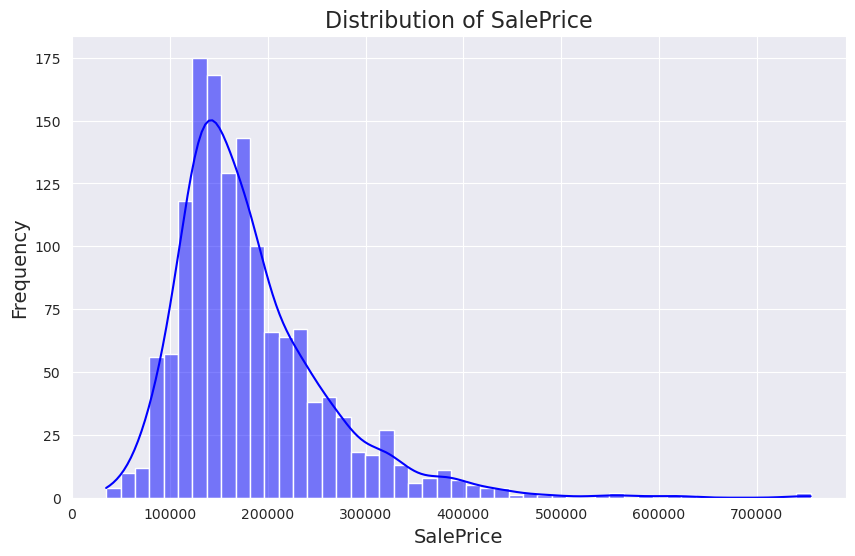

In [67]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=hp_df_cleaned, x='SalePrice', kde=True, color='blue', ax=ax)
ax.set_title('Distribution of SalePrice', fontsize=16)
ax.set_xlabel('SalePrice', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

plt.show()


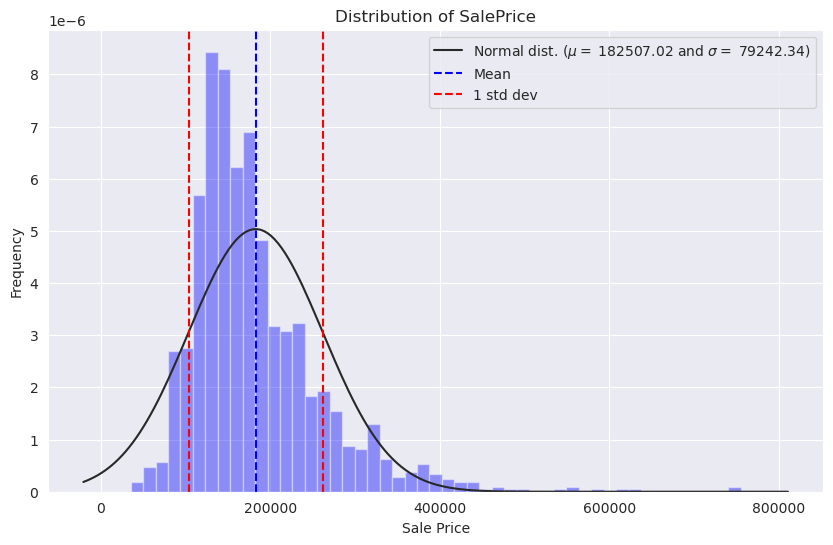

In [68]:
plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.distplot(hp_df_cleaned['SalePrice'], fit=norm, color='blue', kde=False)

# Get the fitted parameters of the normal distribution
(mu, sigma) = norm.fit(hp_df_cleaned['SalePrice'])

# Add a vertical line at the mean
plt.axvline(mu, color='blue', linestyle='--', label='Mean')

# Add a vertical line at 1 standard deviation above the mean
plt.axvline(mu+sigma, color='red', linestyle='--', label='1 std dev')

# Add a vertical line at 1 standard deviation below the mean
plt.axvline(mu-sigma, color='red', linestyle='--')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma), 'Mean', '1 std dev'])
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()


 mu = 12.03 and sigma = 0.39



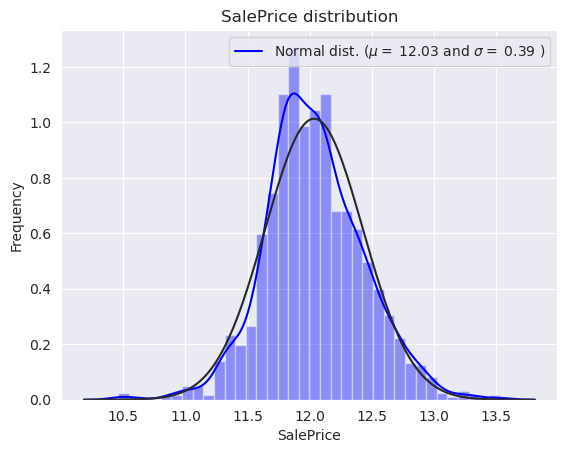

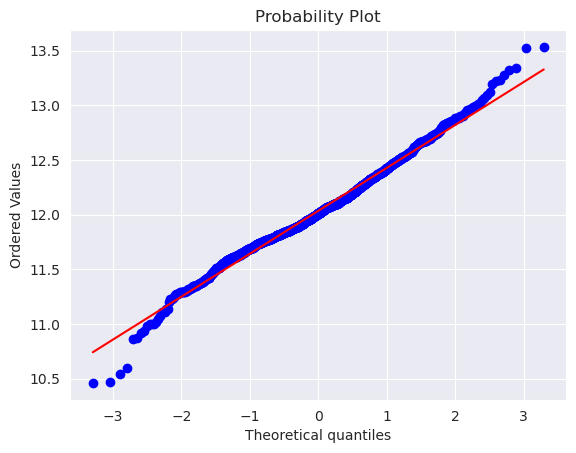

In [69]:
#We use the numpy function log to all elements of the column
hp_df_cleaned["SalePrice"] = np.log(hp_df_cleaned["SalePrice"])

#Checking the new distribution 
sns.set_style('darkgrid')
sns.distplot(hp_df_cleaned['SalePrice'] , fit=norm, color='blue');

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(hp_df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(hp_df_cleaned['SalePrice'], plot=plt)
plt.show()

- > The distribution plot and the QQ-plot of the target variable, SalePrice, shows that it is right-skewed, meaning it is not normally distributed. To make it normally distributed, we need to apply a transformation. In this case, we have used the log transformation method to make the distribution more symmetrical. The transformed distribution shows a better fit to the normal distribution and is suitable for further analysis.

In [70]:
hp_df_cleaned

LotFrontage  GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
0            65.0       2003.0         TA     Attchd          RFn         TA   
1            80.0       1976.0         TA     Attchd          RFn         TA   
2            68.0       2001.0         TA     Attchd          RFn         TA   
3            60.0       1998.0         TA     Detchd          Unf         TA   
4            84.0       2000.0         TA     Attchd          RFn         TA   
...           ...          ...        ...        ...          ...        ...   
1455         62.0       1999.0         TA     Attchd          RFn         TA   
1456         85.0       1978.0         TA     Attchd          Unf         TA   
1457         66.0       1941.0         TA     Attchd          RFn         TA   
1458         68.0       1950.0         TA     Attchd          Unf         TA   
1459         75.0       1965.0         TA     Attchd          Fin         TA   

     BsmtFinType2 BsmtExposure BsmtQual BsmtCond  ... BsmtFinSF1  RoofStyle  \
0             Unf           No       Gd       TA  ...        706      Gable   
1             Unf           Gd       Gd       TA  ...        978      Gable   
2             Unf           Mn       Gd       TA  ...        486      Gable   
3             Unf           No       TA       Gd  ...        216      Gable   
4             Unf           Av       Gd       TA  ...        655      Gable   
...           ...          ...      ...      ...  ...        ...        ...   
1455          Unf           No       Gd       TA  ...          0      Gable   
1456          Rec           No       Gd       TA  ...        790      Gable   
1457          Unf           No       TA       Gd  ...        275      Gable   
1458          Rec           Mn       TA       TA  ...         49        Hip   
1459          LwQ           No       TA       TA  ...        830      Gable   

     Foundation ExterCond ExterQual  Exterior2nd Exterior1st  RoofMatl  \
0         PConc        TA        Gd      VinylSd     VinylSd   CompShg   
1        CBlock        TA        TA      MetalSd     MetalSd   CompShg   
2         PConc        TA        Gd      VinylSd     VinylSd   CompShg   
3        BrkTil        TA        TA      Wd Shng     Wd Sdng   CompShg   
4         PConc        TA        Gd      VinylSd     VinylSd   CompShg   
...         ...       ...       ...          ...         ...       ...   
1455      PConc        TA        TA      VinylSd     VinylSd   CompShg   
1456     CBlock        TA        TA      Plywood     Plywood   CompShg   
1457      Stone        Gd        Ex      CmentBd     CemntBd   CompShg   
1458     CBlock        TA        TA      MetalSd     MetalSd   CompShg   
1459     CBlock        TA        Gd      HdBoard     HdBoard   CompShg   

      SalePrice  Age  
0     12.247694    5  
1     12.109011   31  
2     12.317167    6  
3     11.849398   36  
4     12.429216    8  
...         ...  ...  
1455  12.072541    7  
1456  12.254863   22  
1457  12.493130    4  
1458  11.864462   14  
1459  11.901583   43  

[1412 rows x 72 columns]

In [71]:
#Final check of missing values 
Total_missing = hp_df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*hp_df_cleaned.isnull().sum()/hp_df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
LotFrontage                       0                     0.0
GarageYrBlt                       0                     0.0
MSZoning                          0                     0.0
LotArea                           0                     0.0
Street                            0                     0.0
LotShape                          0                     0.0
LandContour                       0                     0.0
Utilities                         0                     0.0
LotConfig                         0                     0.0
Neighborhood                      0                     0.0
Condition1                        0                     0.0
Condition2                        0                     0.0
BldgType                          0                     0.0
HouseStyle                        0                     0.0
OverallQual                       0                     0.0
LandSlope                         0                     0.0
LowQualFinSF                      0                     0.0
OverallCond                       0                     0.0
2ndFlrSF                          0                     0.0
BsmtFinSF2                        0                     0.0
Foundation                        0                     0.0
SalePrice                         0                     0.0
RoofMatl                          0                     0.0
Exterior1st                       0                     0.0
Exterior2nd                       0                     0.0
ExterQual                         0                     0.0
ExterCond                         0                     0.0
RoofStyle                         0                     0.0
1stFlrSF                          0                     0.0
BsmtFinSF1                        0                     0.0
BsmtUnfSF                         0                     0.0
TotalBsmtSF                       0                     0.0
Heating                           0                     0.0
MSSubClass                        0                     0.0
CentralAir                        0                     0.0
HeatingQC                         0                     0.0
BsmtFullBath                      0                     0.0
SaleCondition                     0                     0.0
BsmtCond                          0                     0.0
Fireplaces                        0                     0.0
Functional                        0                     0.0
Electrical                        0                     0.0
MasVnrType                        0                     0.0
MasVnrArea                        0                     0.0
BsmtFinType1                      0                     0.0
BsmtQual                          0                     0.0
KitchenAbvGr                      0                     0.0
BsmtExposure                      0                     0.0
BsmtFinType2                      0                     0.0
GarageQual                        0                     0.0
GarageFinish                      0                     0.0
GarageType                        0                     0.0
GarageCond                        0                     0.0
KitchenQual                       0                     0.0
BedroomAbvGr                      0                     0.0
SaleType                          0                     0.0
WoodDeckSF                        0                     0.0
MiscVal                           0                     0.0
PoolArea                          0                     0.0
ScreenPorch                       0                     0.0
3SsnPorch                         0                     0.0
EnclosedPorch                     0                     0.0
OpenPorchSF                       0                     0.0
PavedDrive                        0                     0.0
HalfBath                          0                     0.0
GarageArea                        0                    

In [72]:
print(hp_df_cleaned.isnull().sum())

LotFrontage      0
GarageYrBlt      0
GarageCond       0
GarageType       0
GarageFinish     0
GarageQual       0
BsmtFinType2     0
BsmtExposure     0
BsmtQual         0
BsmtCond         0
BsmtFinType1     0
MasVnrArea       0
MasVnrType       0
Electrical       0
Functional       0
Fireplaces       0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
TotRmsAbvGrd     0
GarageCars       0
GrLivArea        0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SaleType         0
SaleCondition    0
BsmtFullBath     0
HeatingQC        0
LowQualFinSF     0
LandSlope        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning    

In [73]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

hp_df_cleaned['ExterQual'] = hp_df_cleaned[['ExterQual']].apply(map_function)
hp_df_cleaned['ExterCond'] = hp_df_cleaned[['ExterCond']].apply(map_function)
hp_df_cleaned['BsmtQual'] = hp_df_cleaned[['BsmtQual']].apply(map_function)
hp_df_cleaned['BsmtCond'] = hp_df_cleaned[['BsmtCond']].apply(map_function)
hp_df_cleaned['BsmtExposure'] = hp_df_cleaned[['BsmtExposure']].apply(map_function1)
hp_df_cleaned['BsmtFinType1'] = hp_df_cleaned[['BsmtFinType1']].apply(map_function2)
hp_df_cleaned['BsmtFinType2'] = hp_df_cleaned[['BsmtFinType2']].apply(map_function2)
hp_df_cleaned['HeatingQC'] = hp_df_cleaned[['HeatingQC']].apply(map_function)
hp_df_cleaned['CentralAir'] = hp_df_cleaned[['CentralAir']].apply(map_function3)
hp_df_cleaned['KitchenQual'] = hp_df_cleaned[['KitchenQual']].apply(map_function)
hp_df_cleaned['Functional'] = hp_df_cleaned[['Functional']].apply(map_function4)
hp_df_cleaned['GarageFinish'] = hp_df_cleaned[['GarageFinish']].apply(map_function5)
hp_df_cleaned['GarageQual'] = hp_df_cleaned[['GarageQual']].apply(map_function)
hp_df_cleaned['GarageCond'] = hp_df_cleaned[['GarageCond']].apply(map_function)
hp_df_cleaned['PavedDrive'] = hp_df_cleaned[['PavedDrive']].apply(map_function6)

In [74]:
hp_df_cleaned

LotFrontage  GarageYrBlt  GarageCond GarageType  GarageFinish  \
0            65.0       2003.0           3     Attchd             2   
1            80.0       1976.0           3     Attchd             2   
2            68.0       2001.0           3     Attchd             2   
3            60.0       1998.0           3     Detchd             1   
4            84.0       2000.0           3     Attchd             2   
...           ...          ...         ...        ...           ...   
1455         62.0       1999.0           3     Attchd             2   
1456         85.0       1978.0           3     Attchd             1   
1457         66.0       1941.0           3     Attchd             2   
1458         68.0       1950.0           3     Attchd             1   
1459         75.0       1965.0           3     Attchd             3   

      GarageQual  BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  ...  \
0              3             1             1         4         3  ...   
1              3             1             4         4         3  ...   
2              3             1             2         4         3  ...   
3              3             1             1         3         4  ...   
4              3             1             3         4         3  ...   
...          ...           ...           ...       ...       ...  ...   
1455           3             1             1         4         3  ...   
1456           3             3             1         4         3  ...   
1457           3             1             1         3         4  ...   
1458           3             3             2         3         3  ...   
1459           3             2             1         3         3  ...   

      BsmtFinSF1  RoofStyle Foundation ExterCond  ExterQual  Exterior2nd  \
0            706      Gable      PConc         3          4      VinylSd   
1            978      Gable     CBlock         3          3      MetalSd   
2            486      Gable      PConc         3          4      VinylSd   
3            216      Gable     BrkTil         3          3      Wd Shng   
4            655      Gable      PConc         3          4      VinylSd   
...          ...        ...        ...       ...        ...          ...   
1455           0      Gable      PConc         3          3      VinylSd   
1456         790      Gable     CBlock         3          3      Plywood   
1457         275      Gable      Stone         4          5      CmentBd   
1458          49        Hip     CBlock         3          3      MetalSd   
1459         830      Gable     CBlock         3          4      HdBoard   

      Exterior1st  RoofMatl  SalePrice  Age  
0         VinylSd   CompShg  12.247694    5  
1         MetalSd   CompShg  12.109011   31  
2         VinylSd   CompShg  12.317167    6  
3         Wd Sdng   CompShg  11.849398   36  
4         VinylSd   CompShg  12.429216    8  
...           ...       ...        ...  ...  
1455      VinylSd   CompShg  12.072541    7  
1456      Plywood   CompShg  12.254863   22  
1457      CemntBd   CompShg  12.493130    4  
1458      MetalSd   CompShg  11.864462   14  
1459      HdBoard   CompShg  11.901583   43  

[1412 rows x 72 columns]

In [75]:
hp_df_cleaned['MSSubClass']= hp_df_cleaned['MSSubClass'].astype('object')

In [76]:
#Final check of missing values 
Total_missing = hp_df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*hp_df_cleaned.isnull().sum()/hp_df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
LotFrontage                       0                     0.0
GarageYrBlt                       0                     0.0
MSZoning                          0                     0.0
LotArea                           0                     0.0
Street                            0                     0.0
LotShape                          0                     0.0
LandContour                       0                     0.0
Utilities                         0                     0.0
LotConfig                         0                     0.0
Neighborhood                      0                     0.0
Condition1                        0                     0.0
Condition2                        0                     0.0
BldgType                          0                     0.0
HouseStyle                        0                     0.0
OverallQual                       0                     0.0
LandSlope                         0                     0.0
LowQualFinSF                      0                     0.0
OverallCond                       0                     0.0
2ndFlrSF                          0                     0.0
BsmtFinSF2                        0                     0.0
Foundation                        0                     0.0
SalePrice                         0                     0.0
RoofMatl                          0                     0.0
Exterior1st                       0                     0.0
Exterior2nd                       0                     0.0
ExterQual                         0                     0.0
ExterCond                         0                     0.0
RoofStyle                         0                     0.0
1stFlrSF                          0                     0.0
BsmtFinSF1                        0                     0.0
BsmtUnfSF                         0                     0.0
TotalBsmtSF                       0                     0.0
Heating                           0                     0.0
MSSubClass                        0                     0.0
CentralAir                        0                     0.0
HeatingQC                         0                     0.0
BsmtFullBath                      0                     0.0
SaleCondition                     0                     0.0
BsmtCond                          0                     0.0
Fireplaces                        0                     0.0
Functional                        0                     0.0
Electrical                        0                     0.0
MasVnrType                        0                     0.0
MasVnrArea                        0                     0.0
BsmtFinType1                      0                     0.0
BsmtQual                          0                     0.0
KitchenAbvGr                      0                     0.0
BsmtExposure                      0                     0.0
BsmtFinType2                      0                     0.0
GarageQual                        0                     0.0
GarageFinish                      0                     0.0
GarageType                        0                     0.0
GarageCond                        0                     0.0
KitchenQual                       0                     0.0
BedroomAbvGr                      0                     0.0
SaleType                          0                     0.0
WoodDeckSF                        0                     0.0
MiscVal                           0                     0.0
PoolArea                          0                     0.0
ScreenPorch                       0                     0.0
3SsnPorch                         0                     0.0
EnclosedPorch                     0                     0.0
OpenPorchSF                       0                     0.0
PavedDrive                        0                     0.0
HalfBath                          0                     0.0
GarageArea                        0                    

In [77]:
# Creating dummies
dummy = pd.get_dummies(hp_df_cleaned[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 154 columns]

In [78]:
# Adding the results back to the cleaned dataframe
hp_df_cleaned = pd.concat([hp_df_cleaned, dummy], axis=1)
hp_df_cleaned.head()

LotFrontage  GarageYrBlt  GarageCond GarageType  GarageFinish  GarageQual  \
0         65.0       2003.0           3     Attchd             2           3   
1         80.0       1976.0           3     Attchd             2           3   
2         68.0       2001.0           3     Attchd             2           3   
3         60.0       1998.0           3     Detchd             1           3   
4         84.0       2000.0           3     Attchd             2           3   

   BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
0             1             1         4         3  ...               0   
1             1             4         4         3  ...               0   
2             1             2         4         3  ...               0   
3             1             1         3         4  ...               0   
4             1             3         4         3  ...               0   

   SaleType_ConLw SaleType_New SaleType_Oth  SaleType_WD  \
0               0            0            0            1   
1               0            0            0            1   
2               0            0            0            1   
3               0            0            0            1   
4               0            0            0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 226 columns]

In [79]:
# Dropping the columns whose dummies have been created
hp_df_cleaned=hp_df_cleaned.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [80]:
hp_df_cleaned.shape

(1412, 202)

## Data Modeling

In [81]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(hp_df_cleaned, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(988, 202)
(424, 202)


In [82]:
# display the first five rows of train dataframe
house_train.head()

LotFrontage  GarageYrBlt  GarageCond  GarageFinish  GarageQual  \
53           68.0       1981.0           3             3           3   
211          83.0       2009.0           3             2           3   
550          53.0       1977.0           3             2           3   
640          62.0       2003.0           3             2           3   
1113         66.0       1953.0           3             1           3   

      BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  ...  \
53               1             4         5         3             6  ...   
211              1             2         4         3             6  ...   
550              1             1         4         3             5  ...   
640              1             4         5         3             6  ...   
1113             1             1         3         3             4  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
53                 0               0             0             0            1   
211                0               0             0             0            1   
550                0               0             0             0            0   
640                0               0             0             0            1   
1113               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
53                        0                     0                     0   
211                       0                     0                     0   
550                       0                     0                     0   
640                       0                     0                     0   
1113                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
53                       1                      0  
211                      1                      0  
550                      0                      0  
640                      1                      0  
1113                     1                      0  

[5 rows x 202 columns]

In [83]:
# display the first five rows of test dataframe
house_test.head()

LotFrontage  GarageYrBlt  GarageCond  GarageFinish  GarageQual  \
357         44.0       1976.0           3             3           3   
512         70.0       1964.0           3             1           3   
548         49.0       1963.0           3             2           3   
546         70.0       1950.0           3             1           3   
888         95.0       1970.0           3             1           3   

     BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  ...  \
357             1             1         4         3             5  ...   
512             2             1         3         3             4  ...   
548             3             1         3         3             2  ...   
546             1             1         4         3             3  ...   
888             3             4         3         4             5  ...   

     SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
357               0               0             0             0            1   
512               0               0             0             0            1   
548               0               0             0             0            1   
546               0               0             0             0            1   
888               0               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
357                      0                     0                     0   
512                      0                     0                     0   
548                      0                     0                     0   
546                      0                     0                     0   
888                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
357                     1                      0  
512                     1                      0  
548                     1                      0  
546                     1                      0  
888                     1                      0  

[5 rows x 202 columns]

In [84]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [85]:
y_test=house_test.pop('SalePrice')
X_test=house_test

### Scalling

In [86]:
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [87]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [88]:
X_train.head()

LotFrontage  GarageYrBlt  GarageCond  GarageFinish  GarageQual  \
53       0.160959     0.736364         0.5      1.000000         0.5   
211      0.212329     0.990909         0.5      0.666667         0.5   
550      0.109589     0.700000         0.5      0.666667         0.5   
640      0.140411     0.936364         0.5      0.666667         0.5   
1113     0.154110     0.481818         0.5      0.333333         0.5   

      BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  ...  \
53             0.0      1.000000  1.000000  0.666667           1.0  ...   
211            0.0      0.333333  0.666667  0.666667           1.0  ...   
550            0.0      0.000000  0.666667  0.666667           0.8  ...   
640            0.0      1.000000  1.000000  0.666667           1.0  ...   
1113           0.0      0.000000  0.333333  0.666667           0.6  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
53               0.0             0.0           0.0           0.0          1.0   
211              0.0             0.0           0.0           0.0          1.0   
550              0.0             0.0           0.0           0.0          0.0   
640              0.0             0.0           0.0           0.0          1.0   
1113             0.0             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
53                      0.0                   0.0                   0.0   
211                     0.0                   0.0                   0.0   
550                     0.0                   0.0                   0.0   
640                     0.0                   0.0                   0.0   
1113                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
53                     1.0                    0.0  
211                    1.0                    0.0  
550                    0.0                    0.0  
640                    1.0                    0.0  
1113                   1.0                    0.0  

[5 rows x 201 columns]

In [89]:
X_train.describe()

LotFrontage  GarageYrBlt  GarageCond  GarageFinish  GarageQual  \
count   988.000000   988.000000  988.000000    988.000000  988.000000   
mean      0.166602     0.713616    0.493421      0.573549    0.495445   
std       0.074094     0.218959    0.061287      0.294591    0.062492   
min       0.000000     0.000000    0.000000      0.000000    0.000000   
25%       0.133562     0.572727    0.500000      0.333333    0.500000   
50%       0.164384     0.713692    0.500000      0.666667    0.500000   
75%       0.198630     0.918182    0.500000      0.666667    0.500000   
max       1.000000     1.000000    1.000000      1.000000    1.000000   

       BsmtFinType2  BsmtExposure    BsmtQual    BsmtCond  BsmtFinType1  ...  \
count    988.000000    988.000000  988.000000  988.000000    988.000000  ...   
mean       0.061134      0.224696    0.521930    0.670715      0.516599  ...   
std        0.186439      0.351106    0.224755    0.097159      0.410214  ...   
min        0.000000      0.000000    0.000000    0.000000      0.000000  ...   
25%        0.000000      0.000000    0.333333    0.666667      0.000000  ...   
50%        0.000000      0.000000    0.666667    0.666667      0.600000  ...   
75%        0.000000      0.666667    0.666667    0.666667      1.000000  ...   
max        1.000000      1.000000    1.000000    1.000000      1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      988.000000      988.000000    988.000000    988.000000   
mean         0.004049        0.004049      0.080972      0.001012   
std          0.063532        0.063532      0.272930      0.031814   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   988.000000                  988.0            988.000000   
mean      0.867409                    0.0              0.007085   
std       0.339304                    0.0              0.083916   
min       0.000000                    0.0              0.000000   
25%       1.000000                    0.0              0.000000   
50%       1.000000                    0.0              0.000000   
75%       1.000000                    0.0              0.000000   
max       1.000000                    0.0              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            988.000000            988.000000             988.000000  
mean               0.017206              0.816802               0.082996  
std                0.130106              0.387025               0.276016  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 201 columns]

In [90]:
# verify the X_train to check if SalePrice column is removed
X_train.head()

LotFrontage  GarageYrBlt  GarageCond  GarageFinish  GarageQual  \
53       0.160959     0.736364         0.5      1.000000         0.5   
211      0.212329     0.990909         0.5      0.666667         0.5   
550      0.109589     0.700000         0.5      0.666667         0.5   
640      0.140411     0.936364         0.5      0.666667         0.5   
1113     0.154110     0.481818         0.5      0.333333         0.5   

      BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  ...  \
53             0.0      1.000000  1.000000  0.666667           1.0  ...   
211            0.0      0.333333  0.666667  0.666667           1.0  ...   
550            0.0      0.000000  0.666667  0.666667           0.8  ...   
640            0.0      1.000000  1.000000  0.666667           1.0  ...   
1113           0.0      0.000000  0.333333  0.666667           0.6  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
53               0.0             0.0           0.0           0.0          1.0   
211              0.0             0.0           0.0           0.0          1.0   
550              0.0             0.0           0.0           0.0          0.0   
640              0.0             0.0           0.0           0.0          1.0   
1113             0.0             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
53                      0.0                   0.0                   0.0   
211                     0.0                   0.0                   0.0   
550                     0.0                   0.0                   0.0   
640                     0.0                   0.0                   0.0   
1113                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
53                     1.0                    0.0  
211                    1.0                    0.0  
550                    0.0                    0.0  
640                    1.0                    0.0  
1113                   1.0                    0.0  

[5 rows x 201 columns]

In [91]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

### RFE Recursive feature elimination

In [92]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)


LinearRegression()

In [93]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.41992832e-01  5.61719716e-03 -6.52456882e-02  2.31715339e-02
  2.18332760e-01 -2.25892548e-02  3.25273813e-02  2.85221515e-02
  1.31736939e-02  2.29411691e-02  3.43903706e-02  1.26781954e-01
  6.66169470e-02  4.51705900e-02 -1.19441563e-01 -5.58012757e-02
  6.18161327e-02  9.30281397e-02  6.18175543e-03  2.58418756e-02
  1.27716087e-01  2.09829838e+10  8.80035324e-02 -7.65813028e-03
  6.39188389e-02  9.70049406e-03  1.48944766e-02  4.78412018e-02
  9.19189604e-02  9.55198840e-02 -1.18001898e-02  8.16171844e-02
  3.63156934e-02 -2.97232956e+09  3.86586427e-01  5.69903559e-01
  2.21660076e-01 -1.07305254e+10 -4.23439712e+09 -1.44979012e+10
  7.55415871e-02  8.89108487e+09 -6.71068635e+09 -6.02123227e+09
 -7.12301757e-02  2.05053401e-02 -4.96567706e-02 -7.33148151e-02
  2.43747072e-02 -3.32254264e-01 -1.51843231e-02 -4.25835902e-02
 -4.26975532e-02 -1.73972752e-01 -1.36583181e-01 -5.82579883e-02
  1.74505506e+10 -5.35722825e-02 -1.40139625e-01 -1.15813642e-01
 -1.27976795e-01  5.22943

In [97]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=90)
rfe.fit(X_train, y_train)
print(rfe.support_) 
print(rfe.ranking_)


[ True False False False  True False False False False False False  True
 False  True  True False False  True False False  True  True False False
  True False False False  True False False  True False  True  True  True
  True  True  True  True  True  True  True  True  True False  True False
 False  True False False False  True  True  True  True False  True  True
  True  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
  True False False False  True False False False False False  True  True
 False False False False  True False  True False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
 False False  True False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False False False False False False False False False False False  True
 False  True False False False False False False  T

In [98]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'GarageQual', 'Functional', 'KitchenQual',
       'KitchenAbvGr', 'FullBath', 'GarageCars', 'GrLivArea', 'WoodDeckSF',
       'ScreenPorch', 'BsmtFullBath', 'LowQualFinSF', 'OverallQual', 'LotArea',
       'OverallCond', '2ndFlrSF', 'BsmtFinSF2', '1stFlrSF', 'CentralAir',
       'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'ExterCond', 'Age',
       'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgTyp

In [99]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['GarageYrBlt', 'GarageCond', 'GarageFinish', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea',
       'Fireplaces',
       ...
       'GarageType_BuiltIn', 'GarageType_Detchd', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=111)

In [101]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [104]:
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

const  LotFrontage  GarageQual  Functional  KitchenQual  KitchenAbvGr  \
53      1.0     0.160959         0.5         1.0     0.666667           0.0   
211     1.0     0.212329         0.5         1.0     0.666667           0.0   
550     1.0     0.109589         0.5         1.0     0.333333           0.0   
640     1.0     0.140411         0.5         1.0     1.000000           0.0   
1113    1.0     0.154110         0.5         1.0     0.666667           0.0   

      FullBath  GarageCars  GrLivArea  WoodDeckSF  ...  Foundation_Wood  \
53    0.000000        0.75   0.347697    1.000000  ...              0.0   
211   0.666667        0.50   0.191679    0.116686  ...              0.0   
550   0.666667        0.50   0.156265    0.000000  ...              0.0   
640   0.333333        0.50   0.267459    0.215869  ...              0.0   
1113  0.333333        0.25   0.141159    0.000000  ...              0.0   

      Heating_Grav  Heating_OthW  Electrical_Mix  GarageType_CarPort  \
53             0.0           0.0             0.0                 0.0   
211            0.0           0.0             0.0                 0.0   
550            0.0           0.0             0.0                 0.0   
640            0.0           0.0             0.0                 0.0   
1113           0.0           0.0             0.0                 0.0   

      SaleType_ConLI  SaleType_New  SaleType_Oth  SaleCondition_Alloca  \
53               0.0           0.0           0.0                   0.0   
211              0.0           0.0           0.0                   0.0   
550              0.0           0.0           0.0                   0.0   
640              0.0           0.0           0.0                   0.0   
1113             0.0           0.0           0.0                   0.0   

      SaleCondition_Normal  
53                     1.0  
211                    1.0  
550                    0.0  
640                    1.0  
1113                   1.0  

[5 rows x 91 columns]

In [105]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     149.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:51:28   Log-Likelihood:                 846.57
No. Observations:                 988   AIC:                            -1527.
Df Residuals:                     905   BIC:                            -1121.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5111 

In [107]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features     VIF
0                  const    0.00
1            LotFrontage    1.63
2             GarageQual    1.35
3             Functional    1.47
4            KitchenQual    2.64
5           KitchenAbvGr    3.17
6               FullBath    2.40
7             GarageCars    2.16
8              GrLivArea     inf
9             WoodDeckSF    1.29
10           ScreenPorch    1.13
11          BsmtFullBath    2.26
12          LowQualFinSF     inf
13           OverallQual    3.68
14               LotArea    2.05
15           OverallCond    1.78
16              2ndFlrSF     inf
17            BsmtFinSF2     inf
18              1stFlrSF     inf
19            CentralAir    1.81
20           TotalBsmtSF     inf
21             BsmtUnfSF     inf
22            BsmtFinSF1     inf
23             ExterCond    1.43
24                   Age    2.24
25         MSSubClass_45    9.47
26         MSSubClass_75    2.76
27         MSSubClass_80   14.42
28         MSSubClass_85    3.67
29         MSSubClass_90     inf
30        MSSubClass_160    1.87
31        MSSubClass_180    3.50
32        MSSubClass_190   23.48
33           MSZoning_FV    6.81
34           MSZoning_RH    2.65
35           MSZoning_RL   28.23
36           MSZoning_RM   23.47
37           Street_Pave    1.39
38      Utilities_NoSeWa    1.38
39         LotConfig_FR3    1.26
40         LandSlope_Sev    2.15
41  Neighborhood_Crawfor    1.24
42  Neighborhood_MeadowV    1.94
43  Neighborhood_NridgHt    1.59
44  Neighborhood_OldTown    2.23
45  Neighborhood_StoneBr    1.16
46  Neighborhood_Veenker    1.09
47       Condition1_RRNn    1.48
48      Condition2_Feedr    5.21
49       Condition2_Norm    8.26
50       Condition2_PosA    2.22
51       Condition2_PosN     NaN
52       Condition2_RRAe     NaN
53       Condition2_RRAn    2.00
54       Condition2_RRNn    2.03
55       BldgType_2fmCon   22.82
56       BldgType_Duplex     inf
57     HouseStyle_1.5Unf   10.31
58     HouseStyle_2.5Unf    2.73
59     HouseStyle_SFoyer    5.31
60       HouseStyle_SLvl   15.57
61       RoofStyle_Gable  180.61
62     RoofStyle_Gambrel    9.54
63         RoofStyle_Hip  167.13
64     RoofStyle_Mansard    5.73
65        RoofStyle_Shed    2.61
66      RoofMatl_CompShg     inf
67      RoofMatl_Membran     inf
68        RoofMatl_Metal     NaN
69         RoofMatl_Roll     inf
70      RoofMatl_Tar&Grv     inf
71      RoofMatl_WdShake     inf
72      RoofMatl_WdShngl     inf
73   Exterior1st_BrkComm    1.37
74    Exterior1st_CBlock     inf
75   Exterior2nd_Brk Cmn    1.49
76    Exterior2nd_CBlock     inf
77     Exterior2nd_Stone    1.09
78    MasVnrType_BrkFace   25.98
79       MasVnrType_None   28.43
80      MasVnrType_Stone   11.11
81       Foundation_Wood    1.04
82          Heating_Grav    1.37
83          Heating_OthW    1.17
84        Electrical_Mix    1.20
85    GarageType_CarPort    1.54
86        SaleType_ConLI    1.03
87          SaleType_New    2.38
88          SaleType_Oth    1.02
89  SaleCondition_Alloca    1.34
90  SaleCondition_Normal    2.17

- > The Linear regression model was built using a technique called RFE, which selected 90 columns as features. The model had an accuracy of 92.5%, which means that it can predict the outcome variable very well. However, upon further inspection, it was found that the selected features had high multicollinearity, meaning that they were highly correlated with each other. This could potentially affect the accuracy of the model and make it less interpretable. Therefore, it may be necessary to select a subset of features that are less collinear to improve the model's performance and interpretability.

In [108]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [109]:
X_train

LotFrontage  GarageQual  Functional  KitchenQual  KitchenAbvGr  \
53       0.160959         0.5         1.0     0.666667           0.0   
211      0.212329         0.5         1.0     0.666667           0.0   
550      0.109589         0.5         1.0     0.333333           0.0   
640      0.140411         0.5         1.0     1.000000           0.0   
1113     0.154110         0.5         1.0     0.666667           0.0   
...           ...         ...         ...          ...           ...   
826      0.099315         0.5         1.0     0.666667           0.0   
55       0.270548         0.5         1.0     0.333333           0.0   
360      0.164384         0.5         1.0     0.333333           0.0   
81       0.037671         0.5         1.0     0.333333           0.0   
816      0.164384         0.5         1.0     0.333333           0.0   

      FullBath  GarageCars  GrLivArea  WoodDeckSF  ScreenPorch  ...  \
53    0.000000        0.75   0.347697    1.000000     0.000000  ...   
211   0.666667        0.50   0.191679    0.116686     0.000000  ...   
550   0.666667        0.50   0.156265    0.000000     0.454545  ...   
640   0.333333        0.50   0.267459    0.215869     0.000000  ...   
1113  0.333333        0.25   0.141159    0.000000     0.000000  ...   
...        ...         ...        ...         ...          ...  ...   
826   0.333333        0.00   0.085686    0.000000     0.000000  ...   
55    0.666667        0.50   0.244428    0.000000     0.000000  ...   
360   0.333333        0.50   0.117385    0.000000     0.436364  ...   
81    0.666667        0.50   0.222635    0.000000     0.000000  ...   
816   0.333333        0.25   0.141159    0.000000     0.000000  ...   

      Foundation_Wood  Heating_Grav  Heating_OthW  Electrical_Mix  \
53                0.0           0.0           0.0             0.0   
211               0.0           0.0           0.0             0.0   
550               0.0           0.0           0.0             0.0   
640               0.0           0.0           0.0             0.0   
1113              0.0           0.0           0.0             0.0   
...               ...           ...           ...             ...   
826               0.0           0.0           0.0             0.0   
55                0.0           0.0           0.0             0.0   
360               0.0           0.0           0.0             0.0   
81                0.0           0.0           0.0             0.0   
816               0.0           0.0           0.0             0.0   

      GarageType_CarPort  SaleType_ConLI  SaleType_New  SaleType_Oth  \
53                   0.0             0.0           0.0           0.0   
211                  0.0             0.0           0.0           0.0   
550                  0.0             0.0           0.0           0.0   
640                  0.0             0.0           0.0           0.0   
1113                 0.0             0.0           0.0           0.0   
...                  ...             ...           ...           ...   
826                  0.0             0.0           0.0           0.0   
55                   0.0             0.0           0.0           0.0   
360                  0.0             0.0           0.0           0.0   
81                   0.0             0.0           0.0           0.0   
816                  0.0             0.0           0.0           0.0   

      SaleCondition_Alloca  SaleCondition_Normal  
53                     0.0                   1.0  
211                    0.0                   1.0  
550                    0.0                   0.0  
640                    0.0                   1.0  
1113                   0.0                   1.0  
...                    ...                   ...  
826                    0.0                   1.0  
55                     0.0                   1.0  
360                    0.0                   1.0  
81                     0.0                   1.0  
816                    0.0       

### Data Modeling - Advanced Regression
#### Ridge Regression model

In [110]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))


0.9312555215363432


In [111]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003528      0.000441         0.001878        0.000036       0.001   
1       0.003165      0.000110         0.001863        0.000102        0.01   
2       0.003376      0.000308         0.001892        0.000112         0.5   
3       0.003138      0.000116         0.001940        0.000149         1.0   
4       0.005133      0.000762         0.003102        0.000803        10.0   
5       0.003949      0.000345         0.002523        0.000202          50   
6       0.003552      0.000045         0.002124        0.000028         100   
7       0.003511      0.000113         0.002110        0.000299         500   
8       0.002788      0.000055         0.001873        0.000465        1000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.087729          -0.088132          -0.085481   
1   {'alpha': 0.01}          -0.087561          -0.088044          -0.085477   
2    {'alpha': 0.5}          -0.084465          -0.087233          -0.086228   
3    {'alpha': 1.0}          -0.083862          -0.087942          -0.087316   
4   {'alpha': 10.0}          -0.096275          -0.099444          -0.095576   
5     {'alpha': 50}          -0.137581          -0.133861          -0.126314   
6    {'alpha': 100}          -0.163663          -0.159939          -0.152531   
7    {'alpha': 500}          -0.235463          -0.229845          -0.230353   
8   {'alpha': 1000}          -0.264517          -0.258615          -0.258561   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.077245  ...        -0.085226        0.004095                4   
1          -0.076989  ...        -0.085071        0.004133                3   
2          -0.072473  ...        -0.083482        0.005590                1   
3          -0.072451  ...        -0.083772        0.005839                2   
4          -0.077580  ...        -0.092419        0.007681                5   
5          -0.107492  ...        -0.126005        0.010393                6   
6          -0.133317  ...        -0.151666        0.010560                7   
7          -0.205798  ...        -0.226140        0.010410                8   
8          -0.233482  ...        -0.255230        0.011089                9   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.072145           -0.072715           -0.071713   
1           -0.072206           -0.072743           -0.071741   
2           -0.074206           -0.074293           -0.073332   
3           -0.075683           -0.075564           -0.074663   
4           -0.087632           -0.086760           -0.087294   
5           -0.122286           -0.121548           -0.122633   
6           -0.148330           -0.148011           -0.148581   
7           -0.223075           -0.224071           -0.223899   
8           -0.252047           -0.253302           -0.253620   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.075133           -0.071916         -0.072725         0.001250  
1           -0.075206           -0.071994         -0.072778         0.001258  
2           -0.077333           -0.073754         -0.074584         0.001417  
3           -0.078807           -0.075012         -0.075946         0.001478  
4           -0.090518           -0.087328         -0.087906         0.001336  
5           -0.125306           -0.122581         -0.122871         0.001278  
6           -0.151380           -0.149582         -0.149177         0.001221  
7           -0.227178           -0.225707         -0.224786         0.001469  
8           -0.257434           -0.254477         -0.254176         0.001806  

[9 rows x 21 columns]

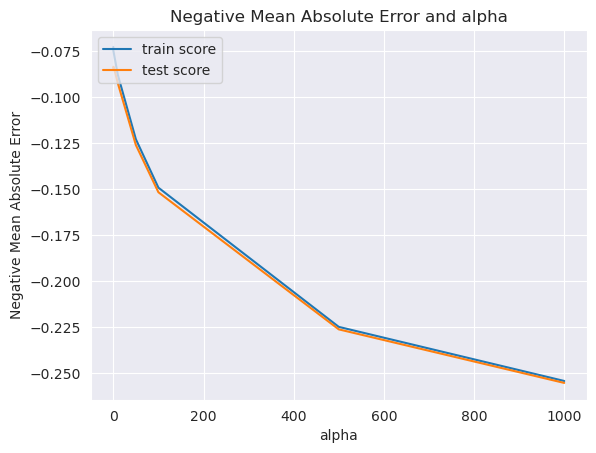

In [113]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [114]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004542      0.000991         0.002439        0.000089       0.001   
1       0.004030      0.000144         0.002390        0.000081        0.01   
2       0.004221      0.000364         0.002361        0.000092         1.0   
3       0.005611      0.003150         0.002532        0.000296         2.0   
4       0.004970      0.000899         0.003253        0.001156         3.0   
5       0.004030      0.000063         0.002412        0.000108         4.0   
6       0.005635      0.002594         0.002704        0.000270         5.0   
7       0.004544      0.000125         0.002861        0.000076         6.0   
8       0.004597      0.000030         0.002855        0.000127         7.0   
9       0.004456      0.000363         0.002770        0.000202         8.0   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.087729          -0.088132          -0.085481   
1   {'alpha': 0.01}          -0.087561          -0.088044          -0.085477   
2    {'alpha': 1.0}          -0.083862          -0.087942          -0.087316   
3    {'alpha': 2.0}          -0.084477          -0.089231          -0.088532   
4    {'alpha': 3.0}          -0.085470          -0.090817          -0.089506   
5    {'alpha': 4.0}          -0.086671          -0.092232          -0.090389   
6    {'alpha': 5.0}          -0.088154          -0.093573          -0.091150   
7    {'alpha': 6.0}          -0.089724          -0.094814          -0.091913   
8    {'alpha': 7.0}          -0.091329          -0.096017          -0.092727   
9    {'alpha': 8.0}          -0.093047          -0.097175          -0.093676   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.077245  ...        -0.085226        0.004095                4   
1          -0.076989  ...        -0.085071        0.004133                3   
2          -0.072451  ...        -0.083772        0.005839                1   
3          -0.072518  ...        -0.084437        0.006177                2   
4          -0.072725  ...        -0.085231        0.006507                5   
5          -0.073010  ...        -0.086071        0.006804                6   
6          -0.073451  ...        -0.086981        0.007040                7   
7          -0.074111  ...        -0.087968        0.007201                8   
8          -0.074876  ...        -0.089033        0.007342                9   
9          -0.075768  ...        -0.090184        0.007460               10   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.072145           -0.072715           -0.071713   
1           -0.072206           -0.072743           -0.071741   
2           -0.075683           -0.075564           -0.074663   
3           -0.077601           -0.077313           -0.076583   
4           -0.079088           -0.078616           -0.078147   
5           -0.080386           -0.079900           -0.079565   
6           -0.081642           -0.081099           -0.080981   
7           -0.082827           -0.082253           -0.082329   
8           -0.084044           -0.083374           -0.083605   
9           -0.085276           -0.084493           -0.084863   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.075133           -0.071916         -0.072725         0.001250  
1           -0.075206           -0.071994         -0.072778         0.001258  
2           -0.078807           -0.075012         -0.075946         0.001478  
3           -0.080745           -0.076920         -0.077832         0.001496  
4           -0.082196           -0.078375         -0.079285         0.001489  
5           -0.083529           -0.079721         -0.080620         0.001480  
6           -0.084747           -0.081134         -0.081920         0.001431  
7           -0.085924           -0

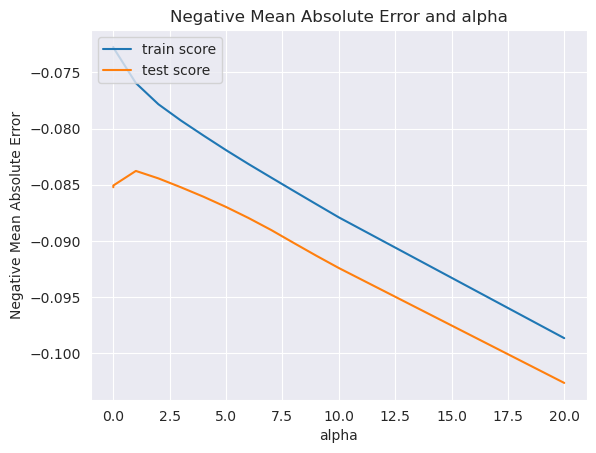

In [116]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [117]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


In [118]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [120]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

- > In order to determine the importance of a variable in predicting the target variable Sale price, we look at the absolute value of the coefficient of that variable. It is important to consider both positive and negative coefficients because a negative coefficient suggests a negative relationship between the variable and the target variable. For example, if we are only interested in the top 10 coefficients, a variable with a coefficient of 0.0 may appear to be more important than one with a coefficient of -0.1. However, in reality, the variable with a coefficient of -0.1 is actually more important in predicting Sale price because it indicates that the variable is needed in the model and excluding it would lead to a significant decrease in accuracy.

In [121]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features  Coefficient        Mod
0         LotFrontage    10.261566  10.261566
13        KitchenQual     0.527282   0.527282
8            BsmtCond     0.406426   0.406426
16           HalfBath     0.355562   0.355562
14       KitchenAbvGr     0.338037   0.338037
18       BsmtHalfBath     0.322512   0.322512
20         GarageCars     0.316265   0.316265
33       LowQualFinSF     0.303286   0.303286
73  LotConfig_CulDSac    -0.272453   0.272453
22         GarageArea     0.264079   0.264079

In [122]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9272
Ridge regression test r2:  0.7454


#### Lasso Regression model


In [123]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012731      0.004039         0.001949        0.000070      0.0001   
1       0.003974      0.000206         0.001923        0.000096       0.001   
2       0.003359      0.000127         0.002378        0.000881        0.01   
3       0.005123      0.001163         0.002885        0.000603        0.05   
4       0.003202      0.000487         0.040984        0.077948         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084392          -0.087014          -0.085745   
1   {'alpha': 0.001}          -0.086163          -0.092204          -0.093486   
2    {'alpha': 0.01}          -0.131861          -0.130856          -0.127707   
3    {'alpha': 0.05}          -0.276921          -0.264422          -0.263074   
4     {'alpha': 0.1}          -0.315126          -0.308787          -0.308269   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.075281  ...        -0.083882        0.004407                1   
1          -0.076930  ...        -0.087589        0.005902                2   
2          -0.107629  ...        -0.124136        0.008859                3   
3          -0.243102  ...        -0.264243        0.011819                4   
4          -0.281726  ...        -0.306029        0.012572                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.074652           -0.074803           -0.073828   
1           -0.083875           -0.083372           -0.082819   
2           -0.123228           -0.122036           -0.121504   
3           -0.259093           -0.262451           -0.261413   
4           -0.302534           -0.304592           -0.305862   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.078045           -0.074270         -0.075120         0.001501  
1           -0.087160           -0.083160         -0.084077         0.001579  
2           -0.123540           -0.120492         -0.122160         0.001120  
3           -0.261942           -0.266934         -0.262367         0.002556  
4           -0.311083           -0.303274         -0.305469         0.003029  

[5 rows x 21 columns]

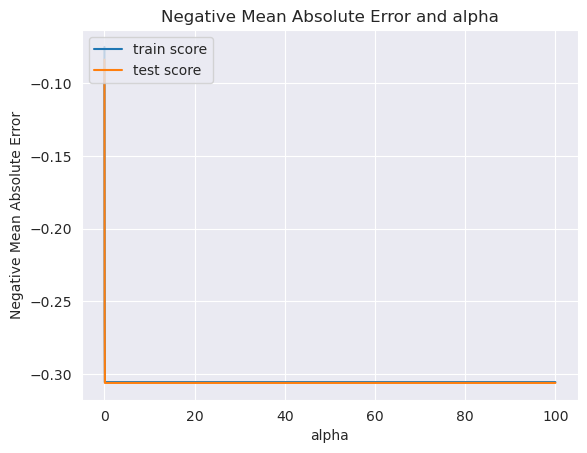

In [125]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [126]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006021      0.001160         0.002592        0.000194       0.001   
1       0.004618      0.000295         0.002553        0.000057        0.01   
2       0.005007      0.001138         0.002858        0.000899        0.05   
3       0.002825      0.000114         0.001802        0.000164         0.1   
4       0.003602      0.001063         0.002348        0.000555         0.2   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.086163          -0.092204          -0.093486   
1   {'alpha': 0.01}          -0.131861          -0.130856          -0.127707   
2   {'alpha': 0.05}          -0.276921          -0.264422          -0.263074   
3    {'alpha': 0.1}          -0.315126          -0.308787          -0.308269   
4    {'alpha': 0.2}          -0.315126          -0.308787          -0.308269   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.076930  ...        -0.087589        0.005902                1   
1          -0.107629  ...        -0.124136        0.008859                2   
2          -0.243102  ...        -0.264243        0.011819                3   
3          -0.281726  ...        -0.306029        0.012572                4   
4          -0.281726  ...        -0.306029        0.012572                4   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.083875           -0.083372           -0.082819   
1           -0.123228           -0.122036           -0.121504   
2           -0.259093           -0.262451           -0.261413   
3           -0.302534           -0.304592           -0.305862   
4           -0.302534           -0.304592           -0.305862   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.087160           -0.083160         -0.084077         0.001579  
1           -0.123540           -0.120492         -0.122160         0.001120  
2           -0.261942           -0.266934         -0.262367         0.002556  
3           -0.311083           -0.303274         -0.305469         0.003029  
4           -0.311083           -0.303274         -0.305469         0.003029  

[5 rows x 21 columns]

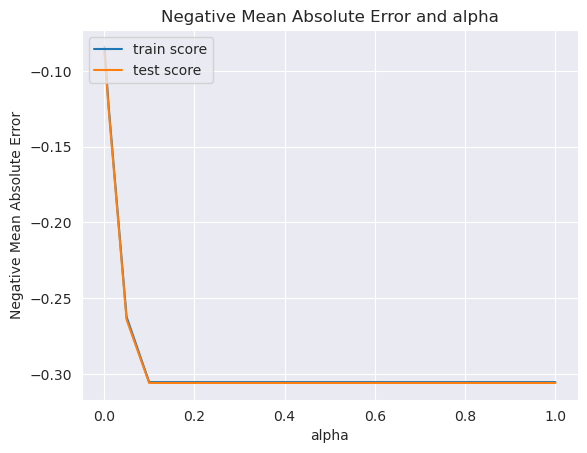

In [128]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [129]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [130]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012830      0.002249         0.002427        0.000421      0.0001   
1       0.005484      0.000376         0.002748        0.000125       0.001   
2       0.004802      0.000212         0.003275        0.001123        0.01   
3       0.004293      0.000702         0.002545        0.000328        0.05   
4       0.003305      0.000060         0.002104        0.000015         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084392          -0.087014          -0.085745   
1   {'alpha': 0.001}          -0.086163          -0.092204          -0.093486   
2    {'alpha': 0.01}          -0.131861          -0.130856          -0.127707   
3    {'alpha': 0.05}          -0.276921          -0.264422          -0.263074   
4     {'alpha': 0.1}          -0.315126          -0.308787          -0.308269   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.075281  ...        -0.083882        0.004407                1   
1          -0.076930  ...        -0.087589        0.005902                2   
2          -0.107629  ...        -0.124136        0.008859                3   
3          -0.243102  ...        -0.264243        0.011819                4   
4          -0.281726  ...        -0.306029        0.012572                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.074652           -0.074803           -0.073828   
1           -0.083875           -0.083372           -0.082819   
2           -0.123228           -0.122036           -0.121504   
3           -0.259093           -0.262451           -0.261413   
4           -0.302534           -0.304592           -0.305862   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.078045           -0.074270         -0.075120         0.001501  
1           -0.087160           -0.083160         -0.084077         0.001579  
2           -0.123540           -0.120492         -0.122160         0.001120  
3           -0.261942           -0.266934         -0.262367         0.002556  
4           -0.311083           -0.303274         -0.305469         0.003029  

[5 rows x 21 columns]

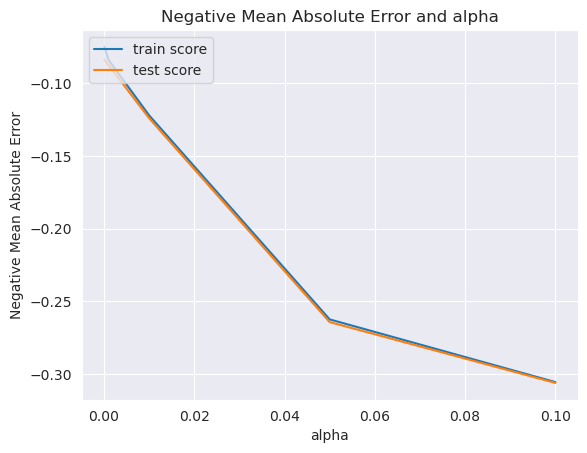

In [132]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [133]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.052399      0.007852         0.002422        0.000207     0.00001   
1       0.012766      0.001213         0.002183        0.000134      0.0001   
2       0.004033      0.000448         0.001828        0.000226       0.001   
3       0.003000      0.000052         0.001647        0.000044        0.01   
4       0.002669      0.000012         0.001626        0.000018        0.05   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.087588          -0.087636          -0.085533   
1  {'alpha': 0.0001}          -0.084392          -0.087014          -0.085745   
2   {'alpha': 0.001}          -0.086163          -0.092204          -0.093486   
3    {'alpha': 0.01}          -0.131861          -0.130856          -0.127707   
4    {'alpha': 0.05}          -0.276921          -0.264422          -0.263074   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.076769  ...        -0.084907        0.004139                2   
1          -0.075281  ...        -0.083882        0.004407                1   
2          -0.076930  ...        -0.087589        0.005902                3   
3          -0.107629  ...        -0.124136        0.008859                4   
4          -0.243102  ...        -0.264243        0.011819                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.072371           -0.072832           -0.071875   
1           -0.074652           -0.074803           -0.073828   
2           -0.083875           -0.083372           -0.082819   
3           -0.123228           -0.122036           -0.121504   
4           -0.259093           -0.262451           -0.261413   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.075446           -0.072146         -0.072934         0.001295  
1           -0.078045           -0.074270         -0.075120         0.001501  
2           -0.087160           -0.083160         -0.084077         0.001579  
3           -0.123540           -0.120492         -0.122160         0.001120  
4           -0.261942           -0.266934         -0.262367         0.002556  

[5 rows x 21 columns]

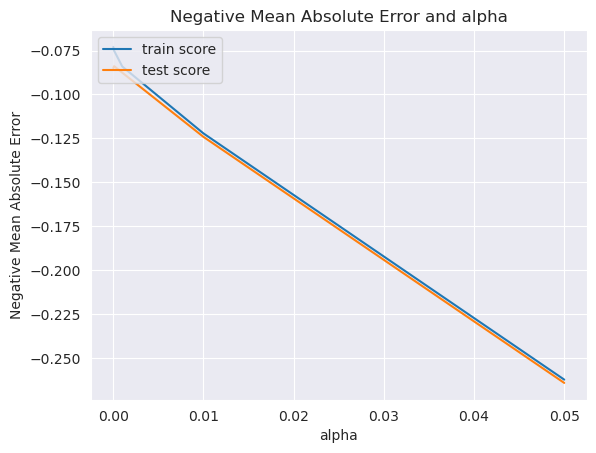

In [135]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [136]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [137]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [138]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.050215      0.008893         0.002724        0.000602     0.00001   
1       0.009987      0.001398         0.001829        0.000331      0.0001   
2       0.003664      0.000413         0.001641        0.000025       0.001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.087588          -0.087636          -0.085533   
1  {'alpha': 0.0001}          -0.084392          -0.087014          -0.085745   
2   {'alpha': 0.001}          -0.086163          -0.092204          -0.093486   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.076769  ...        -0.084907        0.004139                2   
1          -0.075281  ...        -0.083882        0.004407                1   
2          -0.076930  ...        -0.087589        0.005902                3   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.072371           -0.072832           -0.071875   
1           -0.074652           -0.074803           -0.073828   
2           -0.083875           -0.083372           -0.082819   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.075446           -0.072146         -0.072934         0.001295  
1           -0.078045           -0.074270         -0.075120         0.001501  
2           -0.087160           -0.083160         -0.084077         0.001579  

[3 rows x 21 columns]

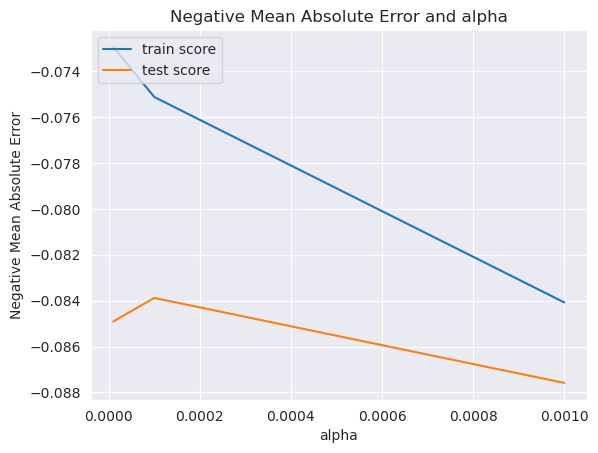

In [139]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [140]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

#### Data Modeling

In [141]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9280945239078153
0.7374543263848093


### Conclusion

- > LotFrontage has a positive correlation with SalePrice, meaning that an increase in linear feet of street connected to the property area results in a higher sale price.
- > A higher number of full bathrooms in the basement (BsmtFullBath) is associated with a higher SalePrice.
- > The overall condition of the house (OverallCond) is an important predictor of SalePrice, and an excellent overall condition results in a higher sale price.
- > Houses located near residential high-density zones (MSZoning_RH) tend to have higher SalePrices.
- > A higher overall quality (OverallQual) is a strong predictor of SalePrice, and houses in excellent condition tend to have higher SalePrices.
- > Houses with CBlock as the Exterior1st tend to have lower SalePrices.
- > A larger garage area is associated with higher SalePrices.
- > Houses with central air conditioning (CentralAir) tend to have higher SalePrices.
- > These variables help describe the linear relationship between the predictor variables and SalePrice, which allows the company to understand which variables are most important for predicting SalePrice and potentially improve their sales by investing in properties with higher SalePrices.
- > The optimal value of alpha for Ridge regression is 1.0, which can help to reduce the effects of multicollinearity and improve the accuracy of the model's predictions.